# MASTER THESIS - Project, University of Leeds, MSc AI
## Integration of LLMs and Clustering Algorithms for Real-Time Optimization of Support Tickets

This work investigates the optimization of customer support systems through the use of Large Language Models (LLMs) for clustering unstructured, unlabeled support tickets in a dynamic environment. The existing dataset includes the feature 'category', which contains the effective labels. However, this feature is only used for evaluating accuracy and F1-score after 'Traditional Clustering'.

In Approach A: The data is analyzed using both supervised and unsupervised clustering methods to examine the impact of specific training approaches on accuracy and F1-score. Using the Llama3-70b-8192 model, tickets are structured and converted into embeddings, which are then grouped and analyzed using various clustering algorithms (KMeans, HDBSCAN, Spectral Clustering, hierarchical clustering with Ward, as well as a combination of UMAP + HDBSCAN). The results show improved accuracy and F1-score compared to traditional unsupervised methods.

Diese Arbeit basiert auf meinem Paper [StudNumber]_MSc_AI_Project_work.
Da das Repo öffentlich ist, teile ich die StudNumber nicht mit.

## INITIALISATION

Initialization of necessary paths and variables. Installation of libraries. Assignment of permissions. Import of the used libraries.

In [ ]:
"""
Global constants for file paths and configuration settings.

These constants define paths for various datasets, embeddings, and configuration files used in the project. They provide a centralized place for managing file paths and related settings, ensuring consistency and ease of maintenance.
"""

DF_KAGGLE_2_SMALL = './drive/Othercomputers/X1/code/datas/origin/kaggle_2_small.csv'
DF_KAGGLE_2_MID = './drive/Othercomputers/X1/code/datas/origin/kaggle_2_mid.csv'
DF_KAGGLE_2_ALL = './drive/Othercomputers/X1/code/datas/origin/kaggle_2_all.csv'

DF_KAGGLE_2_SMALL_LABELS = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_small_labels.json'
DF_KAGGLE_2_MID_LABELS = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_mid_labels.json'
DF_KAGGLE_2_ALL_LABELS = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_all_labels.json'

DF_RM_ALL = './drive/Othercomputers/X1/code/datas/origin/datas_large_rm.json'

DF_KAGGLE_2_SMALL_MAIN_LABELS = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_small_main_labels.json'
DF_KAGGLE_2_MID_MAIN_LABELS = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_mid_main_labels.json'
DF_KAGGLE_2_ALL_MAIN_LABELS = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_all_main_labels.json'

DF_KAGGLE_2_SMALL_MAIN_LABELS_IN_DF = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_small_main_labels_IN_DF.json'
DF_KAGGLE_2_MID_MAIN_LABELS_IN_DF = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_mid_main_labels_IN_DF.json'
DF_KAGGLE_2_LARGE_MAIN_LABELS_IN_DF = './drive/Othercomputers/X1/code/datas/reworked/kaggle_2_all_main_labels_IN_DF.json'

DF_SMALL = './drive/Othercomputers/X1/code/datas/origin/datas_small.json'
DF_MID = './drive/Othercomputers/X1/code/datas/origin/datas_mid.json'

DF_SMALL_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_small.json'
DF_MID_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_mid.json'

DF_SMALL_KAGGLE_SUM = './drive/Othercomputers/X1/code/datas/reworked/kaggle_processed_summarization_per_ticket_small.json'
DF_MID_KAGGLE_SUM = './drive/Othercomputers/X1/code/datas/reworked/kaggle_processed_summarization_per_ticket_mid.json'
DF_ALL_KAGGLE_SUM = './drive/Othercomputers/X1/code/datas/reworked/kaggle_processed_summarization_per_ticket_all.json'

EMBEDDINGS_SMALL = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-small-initial.npy'
EMBEDDINGS_MID = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-mid-initial.npy'

EMBEDDINGS_TEMP = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-temp-initial.npy'

EMBEDDINGS_KAGGLE_SMALL = './drive/Othercomputers/X1/code/datas/embeddings/kaggle_embeddings-small-initial.npy'
EMBEDDINGS_KAGGLE_MID = './drive/Othercomputers/X1/code/datas/embeddings/kaggle_embeddings-mid-initial.npy'
EMBEDDINGS_KAGGLE_ALL = './drive/Othercomputers/X1/code/datas/embeddings/kaggle_embeddings-all-initial.npy'

EMBEDDINGS_SMALL_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_MID_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_LARGE_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'

EMBEDDINGS_SMALL_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_MID_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'
EMBEDDINGS_LARGE_UPDATED = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-updated-mid.npy'

PHASE3_KAGGLE2_EACH_LABEL = './drive/Othercomputers/X1/code/datas/reworked/phase3_each_label.json'
PHASE3_K2_EMBEDDINGS_LABEL = './drive/Othercomputers/X1/code/datas/embeddings/phase3-K2-embeddings-label.npy'
PHASE3_K2_EMBEDDINGS_LABEL_AND_DESCRIPTION = '/drive/Othercomputers/X1/code/datas/embeddings/phase3-K2-embeddings-label-and-description.npy'

EMBEDDINGS_V4 = './drive/Othercomputers/X1/code/datas/V4/embeddings.npy'

FINETUNE_KAGGLE_2 = './drive/Othercomputers/X1/code/datas/V4/fine_tuned_kaggle_2.json'
FINETUENED_MODEL_LLAMA_8B = './drive/Othercomputers/X1/code/datas/V4/fine_tuned_model'
FINETUENED_TOKENIZER_LLAMA_8B = './drive/Othercomputers/X1/code/datas/V4/fine_tuned_tokenizer'
FINETUNED_MODELS = './drive/Othercomputers/X1/code/datas/V4/fine_tuned_models/'

CLUSTER_DF_PATH = './drive/Othercomputers/X1/code/datas/cluster_df.json'
MAX_DISTANCE = 2;


DF_LARGE = './drive/Othercomputers/X1/code/datas/origin/datas_large.json'
DF_LARGE_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_large.json'
EMBEDDINGS_LARGE = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-large-initial.npy'
PHASE3_RM_LARGE_LABEL = './drive/Othercomputers/X1/code/datas/reworked/phase3_rm_large_label.json'
PHASE3_RM_LARGE_EMBEDDINGS_LABEL = './drive/Othercomputers/X1/code/datas/embeddings/phase3_rm_large_embeddings_label.npy'

DF_LARGE_2 = './drive/Othercomputers/X1/code/datas/origin/datas_large_2.json'
DF_LARGE_2_SUM = './drive/Othercomputers/X1/code/datas/reworked/processed_summarization_per_ticket_large_2.json'
EMBEDDINGS_LARGE_2 = './drive/Othercomputers/X1/code/datas/embeddings/embeddings-large_2-initial.npy'
PHASE3_RM_LARGE_2_LABEL = './drive/Othercomputers/X1/code/datas/reworked/phase3_rm_large_2_label.json'
PHASE3_RM_LARGE_2_EMBEDDINGS_LABEL = './drive/Othercomputers/X1/code/datas/embeddings/phase3_rm_large_2_embeddings_label.npy'


DF_GR = './drive/Othercomputers/X1/code/datas/origin/datas_gr.csv'
DF_GR_REWORKED = './drive/Othercomputers/X1/code/datas/reworked/datas_gr_reworked.json'
EMBEDDINGS_GR = './drive/Othercomputers/X1/code/datas/embeddings/embeddings_gr.npy'
DF_GR_LABEL = './drive/Othercomputers/X1/code/datas/reworked/datas_gr_label.json'
EMBEDDINGS_GR_LABEL = './drive/Othercomputers/X1/code/datas/embeddings/embeddings_gr_label.npy'



In [ ]:
"""
Install necessary libraries for the project.

This section installs the required libraries to ensure all dependencies are met.
These libraries include tools for machine learning, data visualization, clustering,
and working with OpenAI and Hugging Face models.
"""

!pip install -q openai==0.28
!pip install -q umap-learn
!pip install -q wordcloud
!pip install -q groq
!pip install -q mplcursors
!pip install -q hdbscan
!pip install -q transformers datasets
!pip install -q huggingface_hub
!pip install -q transformers[torch] accelerate -U
!pip install -q requests
!pip install -q kneed


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 735.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 871.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 109.

In [ ]:
"""
Import necessary libraries for the project.

This section imports all the required libraries for data processing, clustering,
dimensionality reduction, visualization, machine learning, and API interactions.
"""

import os
import openai
import pandas as pd
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import re
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import ipywidgets as widgets
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import umap
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from wordcloud import WordCloud
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import datetime
from IPython.display import display, clear_output
from sklearn.decomposition import PCA
from google.colab import userdata
from groq import Groq
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from umap import UMAP
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict



In [ ]:
"""
Download necessary NLTK resources and set up stopwords.

This section downloads essential NLTK resources for text processing and sets up stopwords
for both German and English languages.
"""

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set up stopwords for both German & English
stop_words_german = set(stopwords.words('german'))
stop_words_english = set(stopwords.words('english'))
print(stop_words_german)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


{'doch', 'seine', 'etwas', 'sein', 'dort', 'dieselben', 'gewesen', 'unseres', 'jener', 'diese', 'dein', 'dieser', 'jeden', 'einmal', 'unser', 'hatte', 'anderem', 'einem', 'gegen', 'werden', 'indem', 'was', 'jenem', 'unsere', 'dies', 'sonst', 'welches', 'deine', 'waren', 'demselben', 'und', 'vor', 'andere', 'im', 'das', 'manchen', 'es', 'die', 'dass', 'desselben', 'wieder', 'will', 'meiner', 'zum', 'mancher', 'ins', 'nach', 'kein', 'ihm', 'unseren', 'von', 'denselben', 'seinem', 'aus', 'einiges', 'sehr', 'ist', 'einigen', 'meinem', 'ihre', 'können', 'solchen', 'ihren', 'damit', 'sie', 'machen', 'anderr', 'hat', 'durch', 'ohne', 'ein', 'aber', 'du', 'jedes', 'dieselbe', 'bis', 'einige', 'warst', 'weiter', 'bin', 'eures', 'haben', 'einigem', 'ihres', 'keinen', 'wir', 'einen', 'einer', 'seines', 'weg', 'keines', 'jenen', 'mich', 'zwischen', 'ihnen', 'solcher', 'deines', 'welcher', 'dessen', 'wird', 'wo', 'wenn', 'des', 'noch', 'solches', 'werde', 'bei', 'dieses', 'weil', 'zwar', 'jetzt', '

In [ ]:
"""
Create access to hugging_face
"""

os.environ['HUGGINGFACE_TOKEN'] = userdata.get('HUGGINGFACE_TOKEN')

In [ ]:
"""
Create access to openAI
"""

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
"""
Create access to Groq
"""

os.environ['GROQ_KEY'] = userdata.get('GROQ_KEY')

In [ ]:
"""
Is OPENAI_API_KEY environment variable set?
"""

if "OPENAI_API_KEY" in os.environ:
    print("OpenAI API key is set.")
else:
    print("OpenAI API key is not set.")


OpenAI API key is set.


In [ ]:
"""
Connect to google drive to get and save datas
"""

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Helper Methods for this project
Frequently used methods are initially prepared here.

#### Preprocess Functions

In [ ]:
def load_data(path):
    """
    Loads data from a given file path into a DataFrame.

    Parameters:
    path (str): The file path to the data. Supports .json and .csv files.

    Returns:
    DataFrame: The loaded data.

    Raises:
    ValueError: If the file format is not supported.
    """

    if path.endswith('.json'):
        df = pd.read_json(path, orient='records', lines=True)
    elif path.endswith('.csv'):
        df = pd.read_csv(path, delimiter=';', encoding='latin-1', on_bad_lines='warn')
    else:
        raise ValueError("Unsupported file format. Please provide a path to a .csv or .json file.")
    return df


In [ ]:
# cleanup datas
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)

    # Lemmatization
    stemmer = SnowballStemmer("german")
    tokens = text.split()

    text = [stemmer.stem(word) for word in tokens if word not in stop_words_german] # stop_words = english and german stopwords (see above)
    return ' '.join(text)

In [ ]:
# Create the core information needed for my project. Use issue title and issue description to create combined_text and clean it up.
def combine_and_clean(datas, df):
  """
  Combines and cleans text data in a DataFrame.

  Parameters:
  datas (str): The file name or path.
  df (DataFrame): The DataFrame containing text data.

  Returns:
  DataFrame: The DataFrame with combined and cleaned text.

  Description:
  - For JSON files, combines 'issue_title' and 'issue_description'.
  - For other files, combines 'title' and 'body'.
  - Applies `preprocess_text` to the combined text.
  """

  if datas.endswith('.json'):
    #df['combined_text'] = df['issue_title'] + "\n\n" + df['issue_description']
    df['combined_text'] = df['subject'] + "\n\n" + df['description']
    df['cleaned_text'] = df['combined_text'].apply(preprocess_text)
  else:

    df['issue_title'] = df['issue_title'].fillna('')
    df['issue_description'] = df['issue_description'].fillna('')

    df['combined_text'] = df['issue_title'] + "\n" + df['issue_description']
    df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

  return df

In [ ]:
def extract_features(texts):
    """
    Extracts TF-IDF features from text data.

    Parameters:
    texts (list of str): The text data to vectorize.

    Returns:
    numpy.ndarray: The TF-IDF feature array.
    """

    # use stopwords for german
    vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=list(stop_words_german))
    features = vectorizer.fit_transform(texts).toarray()
    return features

In [ ]:
def print_column_names(df):
  """
  Prints the column names of a DataFrame.

  Parameters:
  df (DataFrame): The DataFrame whose column names are to be printed.
  """
  column_names = list(df.columns)
  print(column_names)

In [ ]:
def drop_columns(df, columns):
    """
    Drops specified columns from a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame from which columns will be dropped.
    columns (list of str): The list of columns to drop.

    Returns:
    DataFrame: The DataFrame with specified columns dropped.
    """

    return df.drop(columns=columns, errors='ignore')

In [ ]:
def combine_columns(df, source_cols, new_col_name, separator=" "):
    """
    Combines specified columns into a new column with a given separator.

    Parameters:
    df (DataFrame): The DataFrame containing the columns to combine.
    source_cols (list of str): The list of columns to combine.
    new_col_name (str): The name of the new column.
    separator (str, optional): The separator to use between values. Defaults to a space.

    Returns:
    DataFrame: The DataFrame with the new combined column.
    """
    df[new_col_name] = df[source_cols].apply(lambda x: x.astype(str) + '. ', axis=0).agg(separator.join, axis=1)
    return df

In [ ]:
def replace_special_signs(df, column):
    """
    Replaces special characters in a specified column of a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the column to process.
    column (str): The name of the column to modify.

    Returns:
    DataFrame: The DataFrame with special characters replaced in the specified column.
    """
    df[column] = df[column].str.replace(r"[\n\r]", " ", regex=True)
    df[column] = df[column].str.replace(r"[^a-zA-Z0-9\s!.,?äüöéèà']", "", regex=True)
    return df

#### Cluster Helpers


In [ ]:

def determine_optimal_clusters(features, scaled_features, max_clusters=10):
    """
    Determines the optimal number of clusters using the Elbow Method for both normal and scaled features.

    Parameters:
    features (array-like): The feature set to process.
    scaled_features (array-like): The scaled feature set to process.
    max_clusters (int, optional): The maximum number of clusters to test. Default is 10.

    Returns:
    tuple: The elbow points for normal and scaled features respectively.
    """
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    # Berechnen der WCSS für die skalierten Features
    wcss_scaled = []
    for i in range(1, max_clusters + 1):
        kmeans_scaled = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans_scaled.fit(scaled_features)
        wcss_scaled.append(kmeans_scaled.inertia_)

    # Erstellen von zwei Plots nebeneinander
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot für normale Features
    ax[0].plot(range(1, max_clusters + 1), wcss)
    ax[0].set_title('Elbow Method for Normal Features')
    ax[0].set_xlabel('Number of Clusters')
    ax[0].set_ylabel('WCSS')

    # Plot für skalierte Features
    ax[1].plot(range(1, max_clusters + 1), wcss_scaled)
    ax[1].set_title('Elbow Method for Scaled Features')
    ax[1].set_xlabel('Number of Clusters')
    ax[1].set_ylabel('WCSS')

    plt.tight_layout()
    plt.show()

    # Verwende KneeLocator, um den "Elbow"-Punkt für beide zu finden
    kneedle = KneeLocator(range(1, max_clusters + 1), wcss, curve='convex', direction='decreasing')
    elbow_point = kneedle.elbow

    kneedle_scaled = KneeLocator(range(1, max_clusters + 1), wcss_scaled, curve='convex', direction='decreasing')
    elbow_point_scaled = kneedle_scaled.elbow

    print(f'Elbow point for normal features: {elbow_point}')
    print(f'Elbow point for scaled features: {elbow_point_scaled}')

    return elbow_point, elbow_point_scaled


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

def plot_k_distance(data, k, title):
    """
    Plots the k-distance graph to help determine the optimal epsilon value for DBSCAN clustering.

    Parameters:
    data (array-like): The data to process.
    k (int): The number of neighbors to consider.
    title (str): The title for the plot.

    Returns:
    None
    """
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    neighbors = nearest_neighbors.fit(data)
    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances)
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.title(f'k-Distance Graph for {title}')
    plt.show()



In [ ]:
def get_cluster_data(df, embeddings, num_clusters, algorithms,  dimension_suffix,  min_cluster_size_dict, min_samples_dict,):
    """
    Performs clustering on the given embeddings using specified algorithms and updates the DataFrame with cluster labels.

    Parameters:
    df (DataFrame): The DataFrame to update with clustering results.
    embeddings (array-like): The data to cluster.
    num_clusters (int): The number of clusters for algorithms that require it.
    algorithms (list): The list of clustering algorithms to use ('dbscan', 'ward', 'kmeans', 'spectral').
    dimension_suffix (str): Suffix to append to the column names for unique identification.
    min_cluster_size_dict (dict): Dictionary containing minimum cluster size values for 'dbscan'.
    min_samples_dict (dict): Dictionary containing minimum samples values for 'dbscan'.

    Returns:
    dict: A dictionary with algorithm names as keys and cluster labels as values.
    """
    algorithm_functions = {
        'dbscan': perform_hdbscan_clustering,
        'ward': perform_hierarchical_clustering,
        'kmeans': perform_kmeans_clustering,
        'spectral': perform_spectral_clustering
    }
    results = {}

    for algo in algorithms:
        print(algo)

        if algo in algorithm_functions:
            print("ALGO: ", algo)
            if algo == 'dbscan':  # DBSCAN does not use num_clusters
                clusters = algorithm_functions[algo](embeddings, min_cluster_size_dict[dimension_suffix], min_samples_dict[dimension_suffix])
            else:
                clusters = algorithm_functions[algo](embeddings, num_clusters)

            column_name = f'{algo}_{dimension_suffix}'
            df[column_name] = clusters
            results[algo] = clusters
            print(f"Completed {algo} clustering with labels stored in {column_name}.")

    return results

In [ ]:
def perform_kmeans_clustering(matrix, num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42):
    """
    Performs KMeans clustering on the given data matrix.

    Parameters:
    matrix (array-like): The data to cluster.
    num_clusters (int): The number of clusters to form.
    init (str, optional): Method for initialization, default is 'k-means++'.
    max_iter (int, optional): Maximum number of iterations of the k-means algorithm for a single run. Default is 300.
    n_init (int, optional): Number of time the k-means algorithm will be run with different centroid seeds. Default is 10.
    random_state (int, optional): Determines random number generation for centroid initialization. Default is 42.

    Returns:
    array: Cluster labels for each point in the dataset.
    """
    print("Performing KMeans clustering with", num_clusters, "clusters.")

    kmeans = KMeans(n_clusters=num_clusters, init=init, max_iter=max_iter, n_init=n_init, random_state=random_state)

    clusters = kmeans.fit_predict(matrix)

    #silhouette_avg = silhouette_score(matrix, clusters)
    #print("Silhouette Score for", num_clusters, "clusters:", silhouette_avg)

    return clusters

In [ ]:
import hdbscan

def perform_hdbscan_clustering(matrix, min_cluster_size, min_samples):
    """
    Performs HDBSCAN clustering on the given data matrix.

    Parameters:
    matrix (array-like): The data to cluster.
    min_cluster_size (int): The minimum size of clusters.
    min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
    array: Cluster labels for each point in the dataset.
    """
    print("Im HDBSCAN clustering mit min_cluster_size:", min_cluster_size, "und min_samples:", min_samples)

    # Initialisierung des HDBSCAN-Clustering-Algorithmus
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
    clusters = clusterer.fit_predict(matrix)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

    print(f"Anzahl der Cluster: {n_clusters} mit min_cluster_size = {min_cluster_size} und min_samples = {min_samples}")
    return clusters


In [ ]:

def perform_spectral_clustering(matrix, n_clusters):
    """
    Performs Spectral Clustering on the given data matrix.

    Parameters:
    matrix (array-like): The data to cluster.
    n_clusters (int): The number of clusters to form.

    Returns:
    array: Cluster labels for each point in the dataset.
    """
    print("im spectral clustering")
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors',
                                  assign_labels='discretize', random_state=42)
    clusters = spectral.fit_predict(matrix)

        # Calculate the silhouette score
    silhouette_avg = silhouette_score(matrix, clusters)
    print("Silhouette Score for", num_clusters, "clusters:", silhouette_avg)

    return clusters


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def perform_hierarchical_clustering(matrix, num_clusters, method='ward', criterion='maxclust', plot_dendrogram=False):
    """
    Performs hierarchical clustering on the given data matrix and optionally plots the dendrogram.

    Parameters:
    matrix (array-like): The data to cluster.
    num_clusters (int): The number of clusters to form.
    method (str, optional): The linkage algorithm to use. Default is 'ward'.
    criterion (str, optional): The criterion to use in forming flat clusters. Default is 'maxclust'.
    plot_dendrogram (bool, optional): Whether to plot the dendrogram. Default is True.

    Returns:
    array: Cluster labels for each point in the dataset.
    """
    print("Im hierarchischen Clustering")
    try:
        Z = linkage(matrix, method=method)
        clusters = fcluster(Z, num_clusters, criterion=criterion)

        # Berechnung des Silhouette-Scores
        silhouette_avg = silhouette_score(matrix, clusters)
        #print("Silhouette Score for", num_clusters, "clusters:", silhouette_avg)

        if plot_dendrogram:
            plt.figure(figsize=(10, 7))
            dendrogram(Z)
            plt.title('Hierarchical Clustering Dendrogram')
            plt.xlabel('Sample index')
            plt.ylabel('Distance')
            plt.show()

    except Exception as e:
        print("Ein Fehler ist aufgetreten:", e)
        clusters, silhouette_avg = None, None

    return clusters



In [ ]:
def compute_clustering_metrics(matrix, labels):
    """
    Computes clustering metrics: silhouette score and Davies-Bouldin score.

    Parameters:
    matrix (array-like): The data matrix.
    labels (array-like): Cluster labels for each point in the dataset.

    Returns:
    tuple: Silhouette score and Davies-Bouldin score. If there is only one cluster, returns -1 for both scores.
    """
    # Compute silhouette and Davies-Bouldin scores
    if len(set(labels)) > 1:
        silhouette = silhouette_score(matrix, labels)
        davies_bouldin = davies_bouldin_score(matrix, labels)
    else:
        silhouette = -1  # Indicating invalid result for single cluster
        davies_bouldin = -1
    return silhouette, davies_bouldin


In [ ]:
def plot_clustering_metrics(results):
    """
    Plots the clustering metrics for different algorithms.

    Parameters:
    results (dict): A dictionary containing the clustering metrics.

    Returns:
    None
    """
    algorithms = list(results.keys())
    silhouette_scores = [results[alg]["Silhouette"] for alg in algorithms]
    davies_bouldin_scores = [results[alg]["Davies-Bouldin"] for alg in algorithms]

    x = np.arange(len(algorithms))

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 5))
    plt.bar(x, silhouette_scores, color='tab:blue', width=0.4)
    plt.xlabel('Clustering Algorithm')
    plt.ylabel('Silhouette Score')
    plt.xticks(x, algorithms)
    plt.ylim(min(-1, min(silhouette_scores)), max(1, max(silhouette_scores)))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title('Silhouette Scores for Different Clustering Algorithms')
    plt.tight_layout()
    plt.show()

    # Plot Davies-Bouldin Scores
    plt.figure(figsize=(10, 5))
    plt.bar(x, davies_bouldin_scores, color='tab:red', width=0.4)
    plt.xlabel('Clustering Algorithm')
    plt.ylabel('Davies-Bouldin Score')
    plt.xticks(x, algorithms)
    max_abs_db_score = max(abs(min(davies_bouldin_scores)), abs(max(davies_bouldin_scores)))
    plt.ylim(-max_abs_db_score, max_abs_db_score)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title('Davies-Bouldin Scores for Different Clustering Algorithms')
    plt.tight_layout()
    plt.show()

In [ ]:
def print_clustering_metrics(results):
    # Create a DataFrame from the results dictionary
    df = pd.DataFrame(results).T
    # Print the DataFrame
    print(df)

In [ ]:

def visualize_clusters(embeddings, cluster_results, cluster_labels=None):
    """
    Visualizes clusters from multiple clustering algorithms using PCA.

    Parameters:
    embeddings (array-like): The data to be clustered.
    cluster_results (dict): A dictionary with algorithm names as keys and cluster labels as values.
    cluster_labels (array-like, optional): Optional labels for the data points.

    Returns:
    None
    """
    # Determine the number of algorithms
    num_algorithms = len(cluster_results)

    # Set up the subplot grid: 1 row and as many columns as there are algorithms
    fig, axes = plt.subplots(nrows=1, ncols=num_algorithms, figsize=(5 * num_algorithms, 5))

    for ax, (algo, clusters) in zip(axes.flat, cluster_results.items()):
        title = f'{algo.capitalize()} Clustering with UMAP'
        plot_clusters_with_umap(embeddings, clusters, title, ax)

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_clusters_with_umap(matrix, clusters, title, ax, cluster_labels=None):
    """
    Plots clusters using UMAP for dimensionality reduction to 2 components.

    Parameters:
    matrix (array-like): The data to be reduced and plotted.
    clusters (array-like): Cluster labels for each point in the dataset.
    title (str): Title for the plot.
    ax (matplotlib.axes.Axes): The axes object to plot on.
    cluster_labels (dict, optional): Optional dictionary of cluster labels for naming clusters.

    Returns:
    None
    """
    umap_reducer = umap.UMAP(random_state=42)
    umap_result = umap_reducer.fit_transform(matrix)

    # Get unique clusters and create a color map
    unique_clusters = np.unique(clusters)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    # Plot each cluster with a unique color
    for cluster, color in zip(unique_clusters, colors):
        idx = clusters == cluster
        label = cluster_labels[cluster] if cluster_labels and cluster in cluster_labels else f'Cluster {cluster}'
        ax.scatter(umap_result[idx, 0], umap_result[idx, 1], c=[color], label=label, s=10, alpha=0.7)

    ax.set_title(title)
    ax.set_xlabel('UMAP Feature 1')
    ax.set_ylabel('UMAP Feature 2')
    ax.legend()



In [ ]:

def map_clusters_to_actual_labels(df, cluster_label_col, true_label_col):
    """
    Maps clusters to the actual labels by finding the most frequent true label in each cluster.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cluster_label_col (str): The name of the column with cluster labels.
    true_label_col (str): The name of the column with true labels.

    Returns:
    Series, dict: A Series with the most frequent true label for each data point,
                  and a dictionary mapping cluster labels to the most frequent true labels.
    """
    cluster_mode_labels = df.groupby(cluster_label_col)[true_label_col].agg(lambda x: x.mode().iloc[0]).reset_index()
    cluster_mode_labels.columns = [cluster_label_col, 'mode_label']

    df = pd.merge(df, cluster_mode_labels, on=cluster_label_col, how='left')

    return df['mode_label'], cluster_mode_labels.set_index(cluster_label_col)['mode_label'].to_dict()




In [ ]:
def extract_cluster_labels(df):
    """
    Extracts cluster labels from a DataFrame and organizes them into a dictionary.

    Parameters:
    df (DataFrame): The DataFrame containing 'Algorithm', 'Cluster', and 'GPT_Label' columns.

    Returns:
    dict: A dictionary where the keys are algorithm names and the values are dictionaries mapping
          cluster numbers to GPT labels.
    """
    cluster_labels = {}
    for _, row in df.iterrows():
        algorithm = row['Algorithm']
        cluster = row['Cluster']
        label = row['GPT_Label']

        if algorithm not in cluster_labels:
            cluster_labels[algorithm] = {}
        cluster_labels[algorithm][cluster] = label

    return cluster_labels

In [ ]:
def evaluate_clustering(df, cluster_col_kmeans, cluster_col_dbscan):
    """
    Evaluates the clustering performance by mapping clusters to actual labels and calculating accuracy and F1 scores.

    Parameters:
    df (DataFrame): The DataFrame containing the clustering results and true labels.
    cluster_col_kmeans (str): The column name for KMeans cluster labels.
    cluster_col_dbscan (str): The column name for DBSCAN cluster labels.

    Returns:
    None
    """
    # Check which label column is present
    if 'Ticket Type' in df.columns:
        true_label_col = 'Ticket Type'
    elif 'category' in df.columns:
        true_label_col = 'category'
    else:
        raise ValueError("Neither 'Ticket Type' nor 'category' columns found in the DataFrame")

    # Map clusters to actual labels for KMeans
    df['mapped_label_kmeans'], label_map_kmeans = map_clusters_to_actual_labels(df, cluster_col_kmeans, true_label_col)
    accuracy_kmeans = accuracy_score(df[true_label_col], df['mapped_label_kmeans'])
    f1_kmeans = f1_score(df[true_label_col], df['mapped_label_kmeans'], average='weighted')

    # Map clusters to actual labels for DBSCAN
    df['mapped_label_dbscan'], label_map_dbscan = map_clusters_to_actual_labels(df, cluster_col_dbscan, true_label_col)
    accuracy_dbscan = accuracy_score(df[true_label_col], df['mapped_label_dbscan'])
    f1_dbscan = f1_score(df[true_label_col], df['mapped_label_dbscan'], average='weighted')

    print(f"Mapped Accuracy (KMeans): {accuracy_kmeans}")
    print(f"Mapped F1 Score (KMeans): {f1_kmeans}")
    print(f"Label Mapping (KMeans): {label_map_kmeans}")
    print("-----------------------------------")
    print(f"Mapped Accuracy (DBSCAN): {accuracy_dbscan}")
    print(f"Mapped F1 Score (DBSCAN): {f1_dbscan}")
    print(f"Label Mapping (DBSCAN): {label_map_dbscan}")
    print("-----------------------------------")


#### LLMs Helpers


In [ ]:
# Detailed instructions for LLMs (Prompt)

def get_detailed_instructions():

  # V.0.1
  '''
  detailed_instructions = """
  You are a highly capable technical support assistant. For each issue, provide a brief summary and categorize the issue as specific as possible in a one-word-label. Concentrate on technique.
  Please write your response in the following format and without introduction:
  Summary: [Provide a concise summary of the issue.]
  Category: [Insert a specific one-word-label, that categorize the issue specific help a supportteam at further work.]
  """
  return detailed_instructions
  '''

  # V.0.2
  '''
  detailed_instructions = """
  You are a highly capable technical supporter. For each issue, provide a clean technical summary categorized under the following headers:\n"
  - [reported problem, what does the user wants to say? write in direct language without introduction]\n
  - Affected Systems: [List affected systems e.g., VDI, Email Servers, etc.]\n
  """
  return detailed_instructions
  '''

  # V.1.0 (activated with one-shot-prompt)
  detailed_instructions = """
  You are a technical support assistant tasked with summarizing technical issues concisely and factually. For each ticket, generate a summary that strictly follows the given format: [Problem description]. [Affected systems]. Do not include any additional text, greetings, or extraneous information.

Example:
The user has reported an issue where they are unable to login to the web application. They have tried multiple browsers including Chrome, Firefox, and Edge but the problem persists. The issue seems to be related to their VDI environment.

Correct Output Format:
User can't login to web application. Tried multiple browsers (Chrome, Firefox, Edge). Issue related to VDI environment.

Now, process the following description:
Description: {description}

  """
  return detailed_instructions



  # V.0.3 - with concrete categories
  '''
  detailed_instructions = """
You are a highly capable technical support assistant. For each issue, provide a brief summary and categorize the issue by selecting exactly one category from the following options:
- Billing inquiry
- Product inquiry
- Technical issue
- Account access
- Cancellation request

Please write your response in the following format:
Summary: [Provide a concise summary of the issue.]
Category: [Insert exactly one category from the list above.]
"""
'''


  # V.0.4 with other categories
'''
  detailed_instructions = """
You are a highly capable technical support assistant. For each issue, provide a brief summary and categorize the issue by selecting exactly one category from the following options:
- Support (VDI)
- Support (E-Mail)
- Support (mobile App)
- Support (Information Manager (IM))
- Support (IN2, Webapplikation)
- Incident (VDI)
- Incident (E-Mail)
- Incident (mobile App)
- Incident (Information Manager (IM))
- Incident (IN2, Webapplikation)
- Featurerequest (VDI)
- Featurerequest (E-Mail)
- Featurerequest (mobile App)
- Featurerequest (Information Manager (IM))
- Featurerequest (IN2, Webapplikation)


Please write your response in the following format:
Summary: [Provide a concise summary of the issue.]
Category: [Insert exactly one category from the list above.]
"""
'''


'\n  detailed_instructions = """\nYou are a highly capable technical support assistant. For each issue, provide a brief summary and categorize the issue by selecting exactly one category from the following options:\n- Support (VDI)\n- Support (E-Mail)\n- Support (mobile App)\n- Support (Information Manager (IM))\n- Support (IN2, Webapplikation)\n- Incident (VDI)\n- Incident (E-Mail)\n- Incident (mobile App)\n- Incident (Information Manager (IM))\n- Incident (IN2, Webapplikation)\n- Featurerequest (VDI)\n- Featurerequest (E-Mail)\n- Featurerequest (mobile App)\n- Featurerequest (Information Manager (IM))\n- Featurerequest (IN2, Webapplikation)\n\n\nPlease write your response in the following format:\nSummary: [Provide a concise summary of the issue.]\nCategory: [Insert exactly one category from the list above.]\n"""\n'

In [ ]:

def rework_ticket_description_openai(ticket_text):
    """
    Reworks a given ticket description using OpenAI's GPT-3.5-turbo model.

    Parameters:
    ticket_text (str): The original ticket description to be reworked.

    Returns:
    str: The reworked ticket description if successful, or an error message if failed.
    """

    openai.api_key = os.getenv("OPENAI_API_KEY")


    # get the prompt
    detailed_instructions = get_detailed_instructions()
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ]
        )

        if response and 'choices' in response and len(response['choices']) >= 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"




In [ ]:

def rework_ticket_description_llama(ticket_text):
    """
    Reworks a given ticket description using the Llama3-70b-8192 model through the Groq API.

    Parameters:
    ticket_text (str): The original ticket description to be reworked.

    Returns:
    str: The reworked ticket description if successful, or an error message if failed.
    """

    detailed_instructions = get_detailed_instructions()

    groq_key = os.getenv('GROQ_KEY')
    client = Groq(api_key=groq_key)

    # Creating a chat completion with system and user messages
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": detailed_instructions},
            {"role": "user", "content": ticket_text}
        ],
        model='llama3-70b-8192'
    )

    reworked_text = chat_completion.choices[0].message.content
    return reworked_text.strip()  # Removes any extra whitespace


In [ ]:
def get_embeddings_impl(texts, embeddings_file_path):
  """
  Generates embeddings for a list of texts using OpenAI's text-embedding-3-small model.
  Saves the embeddings to a file if not already present.

  Parameters:
  texts (list of str): The list of texts to generate embeddings for.
  embeddings_file_path (str): The file path to save or load the embeddings.

  Returns:
  numpy.ndarray: Array of embeddings.
  """

  # Explicitly set the OpenAI API key
  openai.api_key = os.getenv("OPENAI_API_KEY")

  print(embeddings_file_path)
  if not os.path.exists(embeddings_file_path):
    embeddings = []
    for text in texts:
        response = openai.Embedding.create(
            input=text,
            engine="text-embedding-3-small"
        )
        embeddings.append(response['data'][0]['embedding'])

    # save:
    np.save(embeddings_file_path, embeddings)
  else:
    embeddings = np.load(embeddings_file_path)

  return np.array(embeddings)

In [ ]:
def check_unit_norm_normalization(embeddings):
    """
    Checks if embeddings are normalized to have unit norm.

    Parameters:
    embeddings (numpy.ndarray): The array of embeddings to check.

    Returns:
    bool: True if all embeddings have unit norm, False otherwise.
    """
    norms = np.linalg.norm(embeddings, axis=1)
    if np.allclose(norms, 1.0):
        print("All embeddings have unit norm.")
        return True
    else:
        print("Some embeddings do not have unit norm.")
        return False

In [ ]:

def determine_optimal_clusters_embeddings(original_matrix, scaled_matrix, max_clusters=10, threshold=10):
    """
    Determines the optimal number of clusters for both original and scaled embeddings using the Elbow Method.

    Parameters:
    original_matrix (numpy.ndarray): The original data matrix.
    scaled_matrix (numpy.ndarray): The scaled data matrix.
    max_clusters (int, optional): The maximum number of clusters to test. Default is 10.
    threshold (int, optional): Threshold value for handling NaNs. Default is 10.

    Returns:
    tuple: The elbow points for the original and scaled data matrices.
    """
    def calculate_wcss(data):
        wcss = []
        for i in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
            kmeans.fit(data)
            wcss.append(kmeans.inertia_)
        return wcss

    # Handle NaN values
    if np.isnan(original_matrix).any():
        original_matrix = np.nan_to_num(original_matrix, nan=np.nanmean(original_matrix, axis=0))
    if np.isnan(scaled_matrix).any():
        scaled_matrix = np.nan_to_num(scaled_matrix, nan=np.nanmean(scaled_matrix, axis=0))

    # Reshape matrices if they are 1-dimensional
    if len(original_matrix.shape) == 1:
        original_matrix = original_matrix.reshape(-1, 1)
    if len(scaled_matrix.shape) == 1:
        scaled_matrix = scaled_matrix.reshape(-1, 1)

    # Calculate WCSS
    original_wcss = calculate_wcss(original_matrix)
    scaled_wcss = calculate_wcss(scaled_matrix)

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), original_wcss, marker='o')
    plt.title('Elbow Method for Original Data')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_clusters + 1), scaled_wcss, marker='o', color='r')
    plt.title('Elbow Method for Scaled Data')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.tight_layout()
    plt.show()

    # Find the elbow point
    original_kneedle = KneeLocator(range(1, max_clusters + 1), original_wcss, curve='convex', direction='decreasing')
    scaled_kneedle = KneeLocator(range(1, max_clusters + 1), scaled_wcss, curve='convex', direction='decreasing')

    print(f'Elbow point for original data: {original_kneedle.elbow}')
    print(f'Elbow point for scaled data: {scaled_kneedle.elbow}')

    return original_kneedle.elbow, scaled_kneedle.elbow


## Pre-Study: Traditional clustering: comparison of supervised and unsupervised learning.

Using K-Means and DBSCAN.

### Unsupervised

In [ ]:
# Loading Datas, combine the needed columns and clean them up
datas = DF_GR
df = load_data(datas)
df = combine_and_clean(datas, df)

In [ ]:
# Applying TF-IDF to the preprocessed text
features = extract_features(df['cleaned_text'])

In [ ]:
# Use StandardScaler to scale the feautres
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

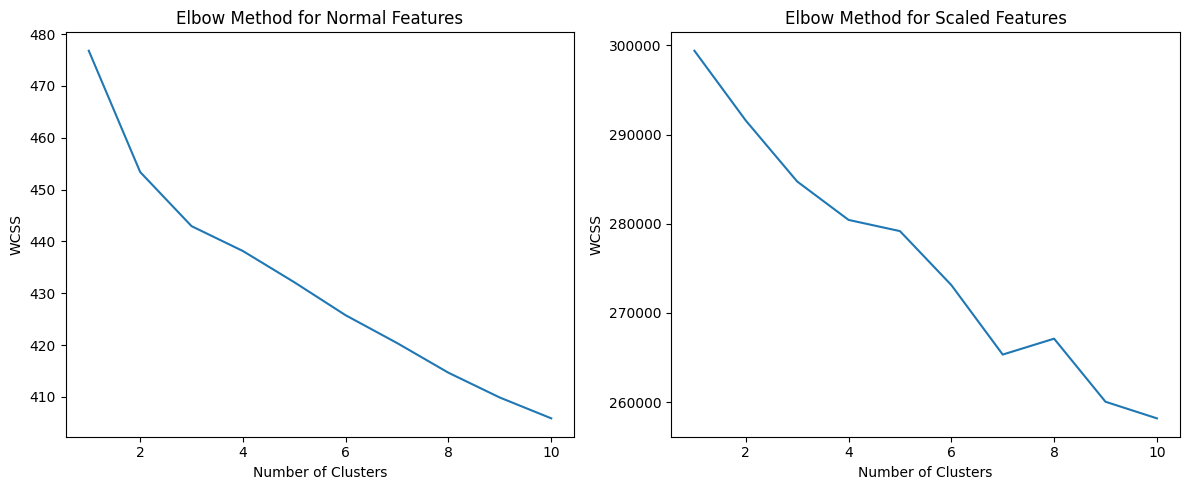

In [ ]:
# Start searching optimal number of clusters
num_clusters, num_clusters_scaled = determine_optimal_clusters(features, scaled_features)
print("Clusters (unscaled): ", num_clusters, " Clusters (scaled): ", num_clusters_scaled)


Elbow point for normal features: 3
Elbow point for scaled features: 7
Clusters (unscaled):  3  Clusters (scaled):  7


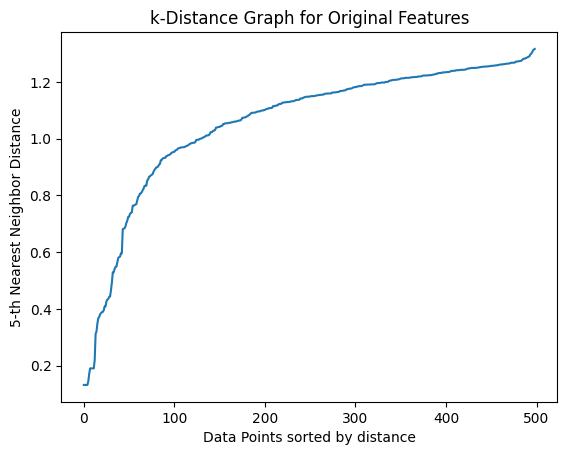

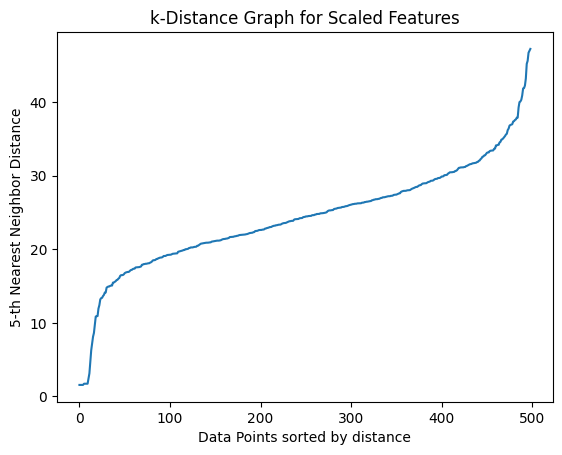

In [ ]:
# Creating   k-Distanz-Diagramms to find out parameters for DBSCAN
plot_k_distance(features, 5, "Original Features")
plot_k_distance(scaled_features, 5, "Scaled Features")

eps_scaled = 22
min_samples_scaled = 3

eps_original = 1.1
min_samples_original = 2


In [ ]:
def apply_kmeans(features, num_clusters_scaled, df):
    """
    Applies KMeans clustering on the given features and adds the cluster labels to the DataFrame.

    Parameters:
    features (array-like): The input features to cluster.
    num_clusters_scaled (int): The number of clusters to form.
    df (DataFrame): The DataFrame to which the cluster labels will be added.

    Returns:
    tuple: A tuple containing the KMeans labels and clusters.
    """
    kmeans = KMeans(n_clusters=num_clusters_scaled, init='k-means++', max_iter=300, tol=1e-4, random_state=42)
    clusters = kmeans.fit_predict(features)
    df['kmeans_label'] = clusters
    return kmeans.labels_, clusters

kmeans_labels, clusters = apply_kmeans(scaled_features, num_clusters_scaled, df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

df = df.drop(df.index[-1])


In [ ]:
def apply_dbscan(features, eps, min_samples):
    """
    Applies DBSCAN clustering on the given features and adds the cluster labels to the DataFrame.

    Parameters:
    features (array-like): The input features to cluster.
    eps (float): The maximum distance between two samples for them to be considered as in the same neighborhood.
    min_samples (int): The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
    df (DataFrame): The DataFrame to which the cluster labels will be added.

    Returns:
    tuple: A tuple containing the cluster labels, number of clusters, and number of noise points.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', algorithm='auto')
    clusters = dbscan.fit_predict(features)
    df['dbscan_label'] = clusters
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_noise_points = np.sum(clusters == -1)

    print(f'Number of clusters: {num_clusters}')
    #print(f'Number of noise points: {num_noise_points}')

    return clusters, num_clusters, num_noise_points
dbscan_labels, num_dbscan_clusters, num_noise_points = apply_dbscan(scaled_features, 22, 3)

Number of clusters: 7


### Evaluate

In [ ]:
def evaluate_clusters(features, labels, method_name):
    """
    Evaluates clustering performance using Silhouette Score, Davies-Bouldin Score, and Calinski-Harabasz Score.

    Parameters:
    features (array-like): The input features used for clustering.
    labels (array-like): The cluster labels assigned to each data point.
    method_name (str): The name of the clustering method for reporting.

    Returns:
    tuple: A tuple containing Silhouette Score, Davies-Bouldin Score, and Calinski-Harabasz Score if there are enough clusters.
           Returns None if there are insufficient clusters for evaluation.
    """

    if len(set(labels)) < 2:  # Silhouette Score requires more than one cluster
        print(f"Silhouette Score ({method_name}): Cannot be computed due to insufficient clusters.")
        return

    silhouette = silhouette_score(features, labels)
    davies_bouldin = davies_bouldin_score(features, labels)
    calinski_harabasz = calinski_harabasz_score(features, labels)

    print(f"{method_name} - Silhouette Score: {silhouette}")
    print(f"{method_name} - Davies-Bouldin Score: {davies_bouldin}")
    print(f"{method_name} - Calinski-Harabasz Score: {calinski_harabasz}")

    return silhouette, davies_bouldin, calinski_harabasz

# KMeans-Clustering
print("Evaluating KMeans Clusters")
kmeans_scores = evaluate_clusters(scaled_features, kmeans_labels, 'KMeans')
print("---------------------------")

# DBSCAN-Clustering
print("Evaluating DBSCAN Clusters")
dbscan_scores = evaluate_clusters(scaled_features, dbscan_labels, 'DBSCAN')


Evaluating KMeans Clusters
KMeans - Silhouette Score: 0.016198972902651376
KMeans - Davies-Bouldin Score: 2.5939634575313595
KMeans - Calinski-Harabasz Score: 12.768449164681554
---------------------------
Evaluating DBSCAN Clusters
DBSCAN - Silhouette Score: -0.13776022965435814
DBSCAN - Davies-Bouldin Score: 1.4538280055584394
DBSCAN - Calinski-Harabasz Score: 2.328746740848958


In [ ]:
try:
    # Evaluierung der Clusterings
    evaluate_clustering(df, 'kmeans_label', 'dbscan_label')
except ValueError as e:
    if str(e) == "Neither 'Ticket Type' nor 'category' columns found in the DataFrame":
        print("*** Sorry, you have unlabeled data. It is not possible to calculate accuracy ***")
    else:
        raise  # re-raise the exception if it is a different ValueError


Mapped Accuracy (KMeans): 0.6673346693386774
Mapped F1 Score (KMeans): 0.585119020153044
Label Mapping (KMeans): {0: 4.0, 1: 5.0, 2: 4.0}
-----------------------------------
Mapped Accuracy (DBSCAN): 0.6613226452905812
Mapped F1 Score (DBSCAN): 0.5440311660841499
Label Mapping (DBSCAN): {-1: 4.0, 0: 5.0, 1: 5.0}
-----------------------------------


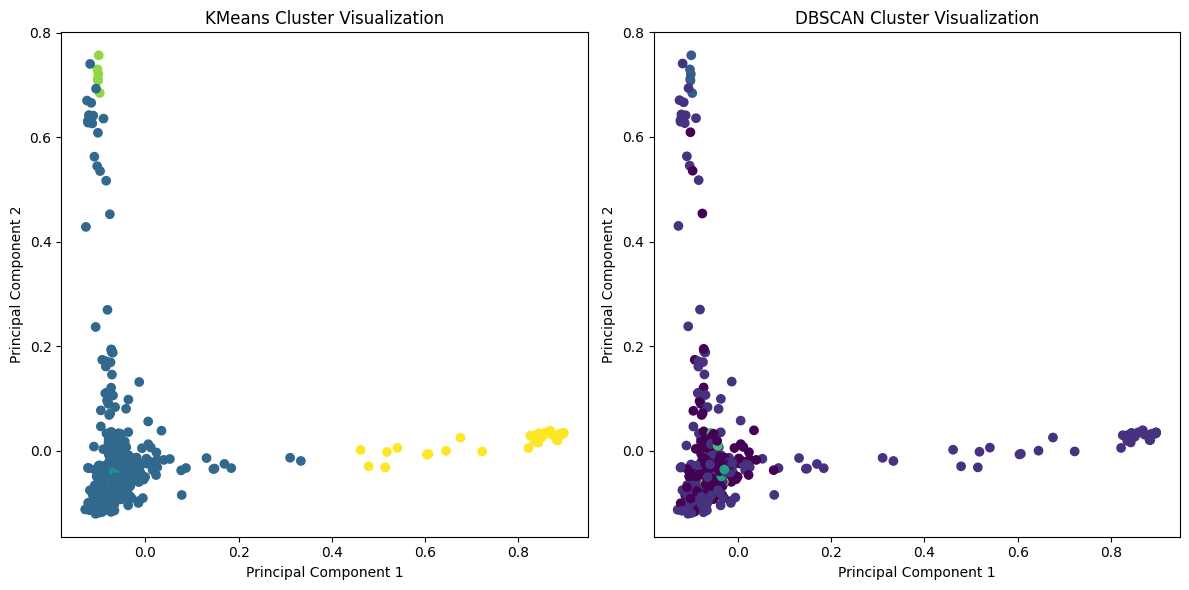

In [ ]:

def visualize_clusters_traditional(features, labels, method_name, ax):
    """
    Visualizes clusters using PCA for dimensionality reduction to 2 components.

    Parameters:
    features (array-like): The input features used for clustering.
    labels (array-like): The cluster labels assigned to each data point.
    method_name (str): The name of the clustering method for the plot title.
    ax (matplotlib.axes.Axes): The axes object to plot on.

    Returns:
    None
    """
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features)
    ax.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{method_name} Cluster Visualization')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualizing clusters for both methods
visualize_clusters_traditional(features, df['kmeans_label'], 'KMeans', axs[0])
visualize_clusters_traditional(features, df['dbscan_label'], 'DBSCAN', axs[1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


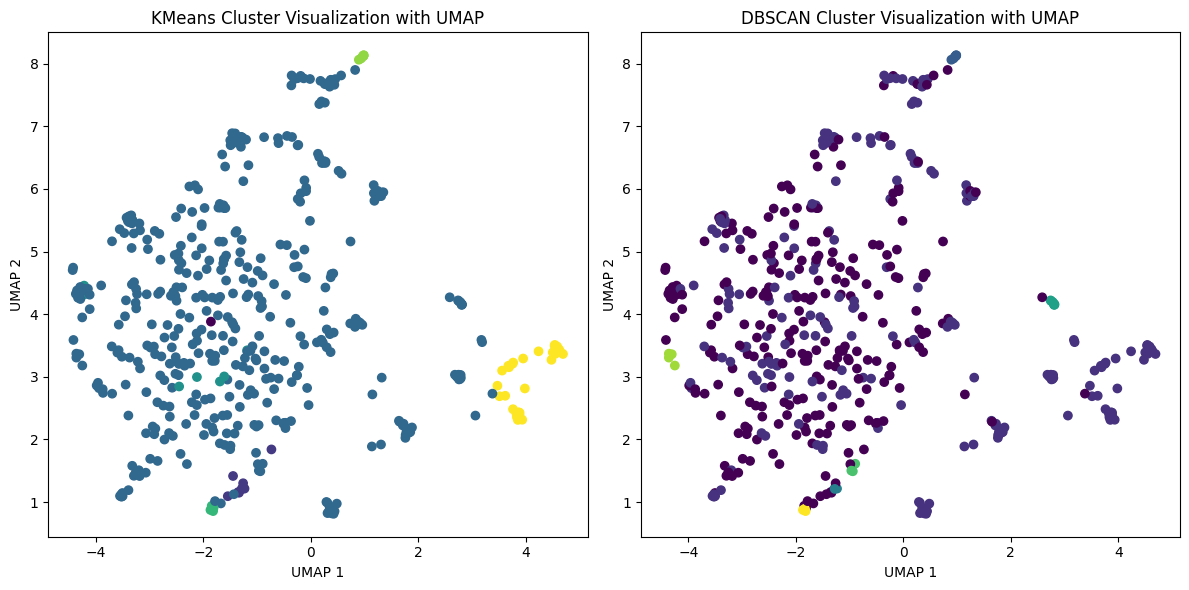

In [ ]:
def visualize_clusters_umap(features, labels, method_name, ax):
    """
    Visualizes clusters using UMAP for dimensionality reduction to 2 components.

    Parameters:
    features (array-like): The input features used for clustering.
    labels (array-like): The cluster labels assigned to each data point.
    method_name (str): The name of the clustering method for the plot title.
    ax (matplotlib.axes.Axes): The axes object to plot on.

    Returns:
    None
    """
    umap = UMAP(n_components=2, random_state=42)  # Initialize UMAP
    embedding = umap.fit_transform(features)  # Fit and transform the features to 2D
    ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_title(f'{method_name} Cluster Visualization with UMAP')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Assuming 'features' is your dataset and 'df' is your DataFrame with labels
visualize_clusters_umap(features, df['kmeans_label'], 'KMeans', axs[0])
visualize_clusters_umap(features, df['dbscan_label'], 'DBSCAN', axs[1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


The visual representation of the clusters shows that most data points belong to a single cluster. Additionally, the separation between the clusters is not clearly discernible.

### Supervised



In [ ]:
# Splitting Datas in Test and Train Datas
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['category'], test_size=0.2, random_state=42)


In [ ]:
# converting the training and test text data into TF-IDF feature vectors
vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('german'))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Training the model with MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test_tfidf)

# Evaluating
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")


Accuracy: 0.8
F1 Score: 0.7472119487908963


## Approach A: Categorization of Support Tickets with LLMs and Clustering Algorithms


Nun verwenden wir auch die erst seit kürzerem bekannten, dafür umso populären LLMs ein, um die Cluster zu bilden.

#### Preprocess Datas

In [ ]:
# Load datas
df = load_data(DF_GR)
df.head(2)

issue_title  \
0                        annual leave   
1  change project manager role oracle   

                                   issue_description  category  
0  re annual leave hello please help absence reco...         4  
1  change role hello dear please change pm role s...         4

In [ ]:
print_column_names(df)

['issue_title', 'issue_description', 'category']


In [ ]:
#df = drop_columns(df, ['ticket_type', 'sub_category1', 'sub_category2', 'business_service', 'urgency', 'impact'])

In [ ]:
source_columns = ['issue_title', 'issue_description']
new_column_name = 'combined_text'
combined_dataset = combine_columns(df, source_columns, new_column_name)

df.head(2)

issue_title  \
0                        annual leave   
1  change project manager role oracle   

                                   issue_description  category  \
0  re annual leave hello please help absence reco...         4   
1  change role hello dear please change pm role s...         4   

                                       combined_text  
0  annual leave.  re annual leave hello please he...  
1  change project manager role oracle.  change ro...

In [ ]:
df = replace_special_signs(df, 'combined_text')

df.head()

issue_title  \
0                        annual leave   
1  change project manager role oracle   
2                    does laptop have   
3                        port opening   
4                      network access   

                                   issue_description  category  \
0  re annual leave hello please help absence reco...         4   
1  change role hello dear please change pm role s...         4   
2        hello tomorrow trip senior developer mobile         5   
3  port opening hello port machine packages provi...         6   
4  hello received workstation granted ad please h...         4   

                                       combined_text  
0  annual leave.  re annual leave hello please he...  
1  change project manager role oracle.  change ro...  
2  does laptop have.  hello tomorrow trip senior ...  
3  port opening.  port opening hello port machine...  
4  network access.  hello received workstation gr...

#### Rework and structure ticket datas

In [ ]:
def remove_phrases(text):
    """
    Removes unwanted phrases from the given text.

    Parameters:
    text (str): The input text from which the phrases will be removed.

    Returns:
    str: The cleaned text with the specified phrases removed.
    """
    phrases_to_remove = [
        r'here is the summary',
        r'here is a technical summary',
        r'here is the processed output',
        r'here is a clean technical summary',
        r'summary of the issue',
        r'here is the output',
        r'here is the processed description',
        r'let me know if you need further assistance!',
    ]

    for phrase in phrases_to_remove:
        text = re.sub(phrase, '', text, flags=re.IGNORECASE).strip()
    return text

In [ ]:
### call llama for rework ticket-texts, if file not already exists

path_to_df = DF_GR_REWORKED

if os.path.exists(path_to_df):
    # Read the existing JSON file into a DataFrame
    df = pd.read_json(path_to_df, orient='records', lines=True)
    print(f"*** File {path_to_df} already exists. DataFrame loaded. ***")
else:

    # Process the DataFrame
    df['reworked_text'] = df['combined_text'].apply(lambda x: rework_ticket_description_llama(x))
    # Spalte 'reworked_text' erstellen und Text in Kleinbuchstaben umwandeln

    # Display the DataFrame to verify the new column
    print(df[['combined_text', 'reworked_text']].head())

    # Save the DataFrame to a JSON file
    df.to_json(path_to_df, orient='records', lines=True)
    print(f"*** DataFrame saved to {path_to_df} ***")

*** File ./drive/Othercomputers/X1/code/datas/reworked/datas_gr_reworked.json already exists. DataFrame loaded. ***


In [ ]:
df['reworked_text'] = df['reworked_text'].str.lower()

In [ ]:
df['reworked_text'] = df['reworked_text'].apply(remove_phrases)

In [ ]:
df.head(3)

issue_title  \
0                        annual leave   
1  change project manager role oracle   
2                    does laptop have   

                                   issue_description  category  \
0  re annual leave hello please help absence reco...         4   
1  change role hello dear please change pm role s...         4   
2        hello tomorrow trip senior developer mobile         5   

                                       combined_text  \
0  annual leave.  re annual leave hello please he...   
1  change project manager role oracle.  change ro...   
2  does laptop have.  hello tomorrow trip senior ...   

                                       reworked_text  
0  user unable to register annual leave. issue re...  
1  project manager role in oracle not updated. pm...  
2  no problem description provided. please provid...

Having now understandable Ticket-Description.
Let's use this information for creating the embeddings with an LLM.

#### Create Embeddings

In [ ]:
# Start Process for creating embeddings with 'reworked_text'
embeddings_file_path = EMBEDDINGS_GR

df['combined_texts'] = df['reworked_text'].fillna('')

combined_texts = df['combined_texts'].tolist()

embeddings = get_embeddings_impl(combined_texts, embeddings_file_path)


./drive/Othercomputers/X1/code/datas/embeddings/embeddings_gr.npy


In [ ]:
# scale generated embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

#### Create Clusters


Now we can start creating the clusters out of the generated embeddings.

In [ ]:
def reduce_dimensions(embeddings, n_components=50):
    """
    Reduces the dimensionality of the given embeddings using PCA.

    Parameters:
    embeddings (array-like): The input embeddings to be reduced.
    n_components (int, optional): The number of components to keep. Default is 50.

    Returns:
    array-like: The reduced embeddings.
    """

    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    return reduced_embeddings

embeddings_50 = reduce_dimensions(embeddings, 50)
embeddings_200 = reduce_dimensions(embeddings, 200)
embeddings_scaled_50 = reduce_dimensions(embeddings_scaled, 50)
embeddings_scaled_200 = reduce_dimensions(embeddings_scaled, 200)


************ all dimensions *************


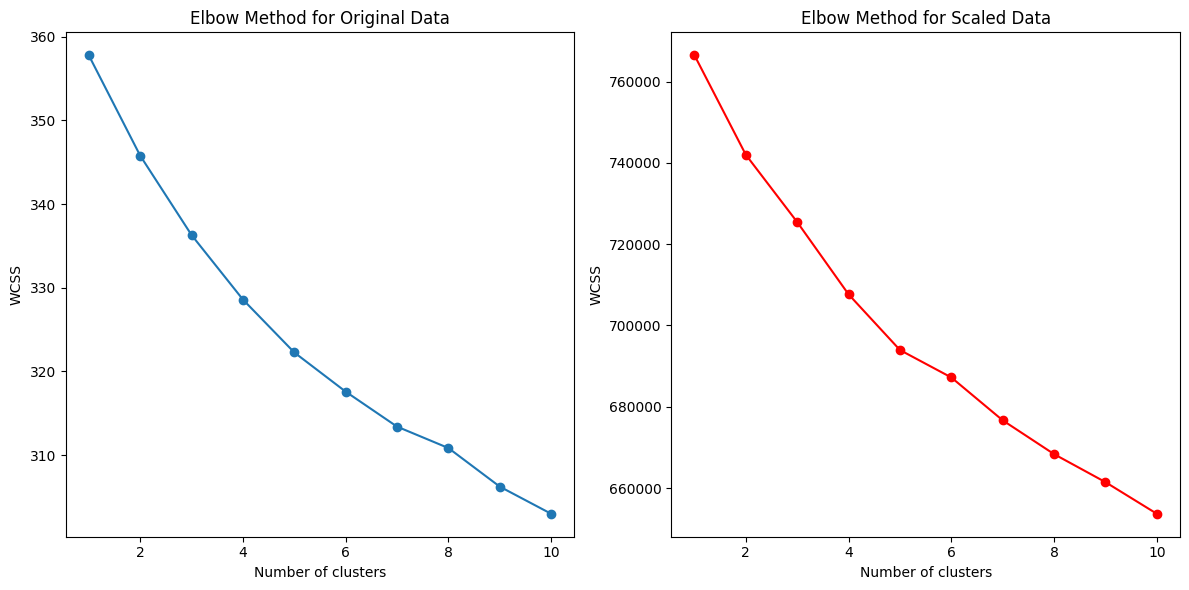

Elbow point for original data: 5
Elbow point for scaled data: 5

************ 50 dimensions *************


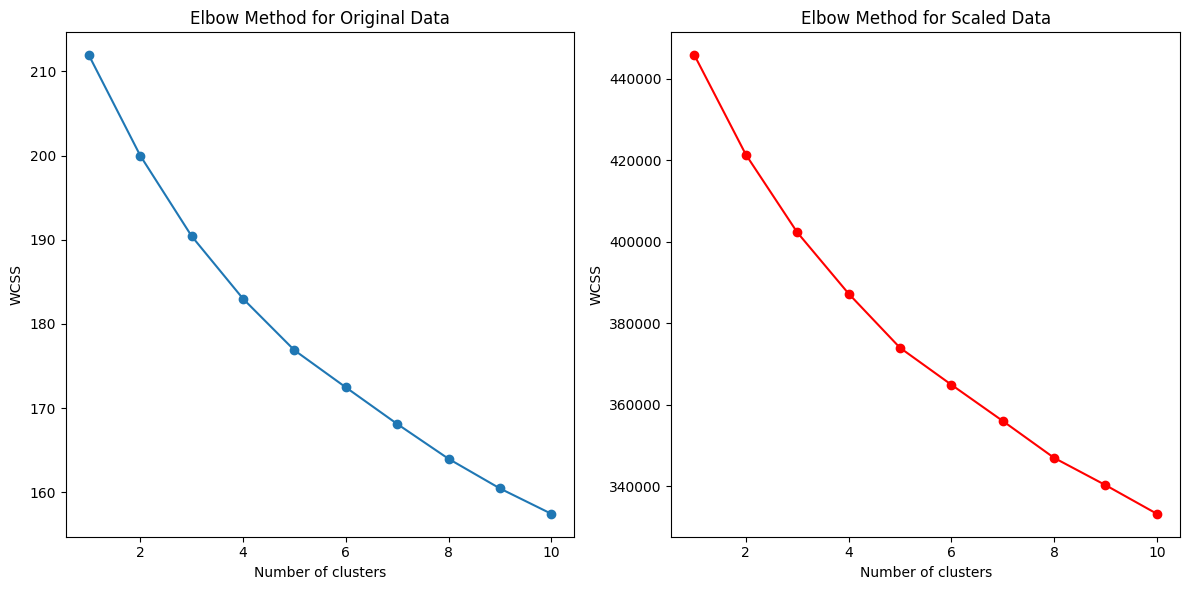

Elbow point for original data: 5
Elbow point for scaled data: 5

************ 200 dimensions *************


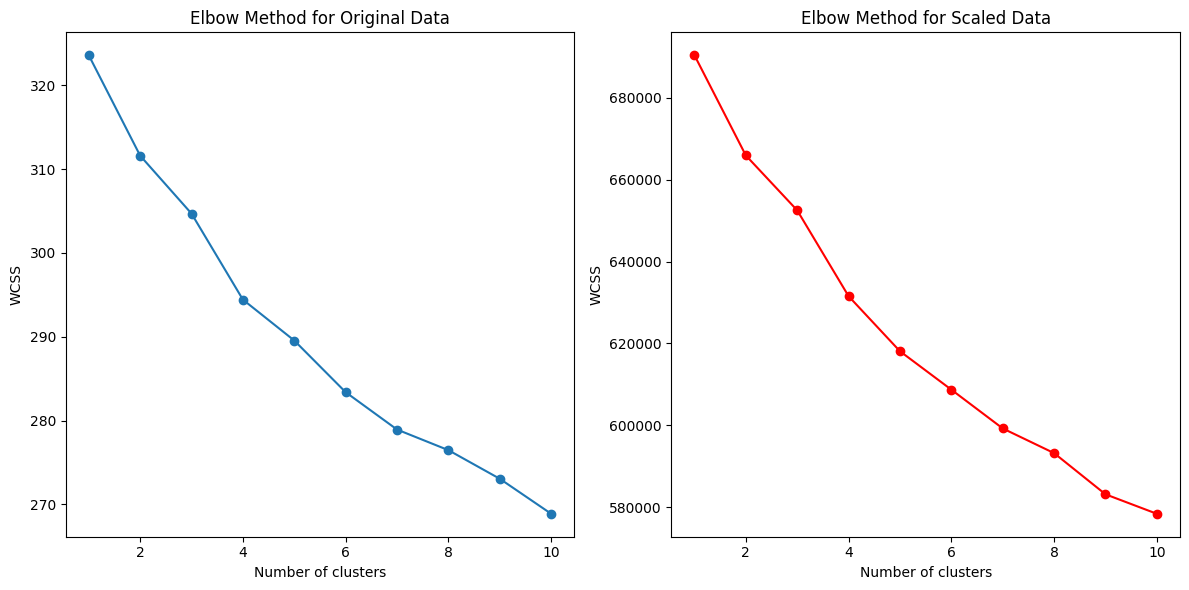

Elbow point for original data: 6
Elbow point for scaled data: 5


In [ ]:
# Start Plotting the Elbow Curves for all embeddings
print( "\n************ all dimensions *************")
num_clusters, num_clusters_scaled = determine_optimal_clusters_embeddings(embeddings, embeddings_scaled)
print( "\n************ 50 dimensions *************")
num_clusters, num_clusters_scaled = determine_optimal_clusters_embeddings(embeddings_50, embeddings_scaled_50)
print( "\n************ 200 dimensions *************")
num_clusters, num_clusters_scaled = determine_optimal_clusters_embeddings(embeddings_200, embeddings_scaled_200)

In [ ]:
embeddings.shape

(499, 1536)

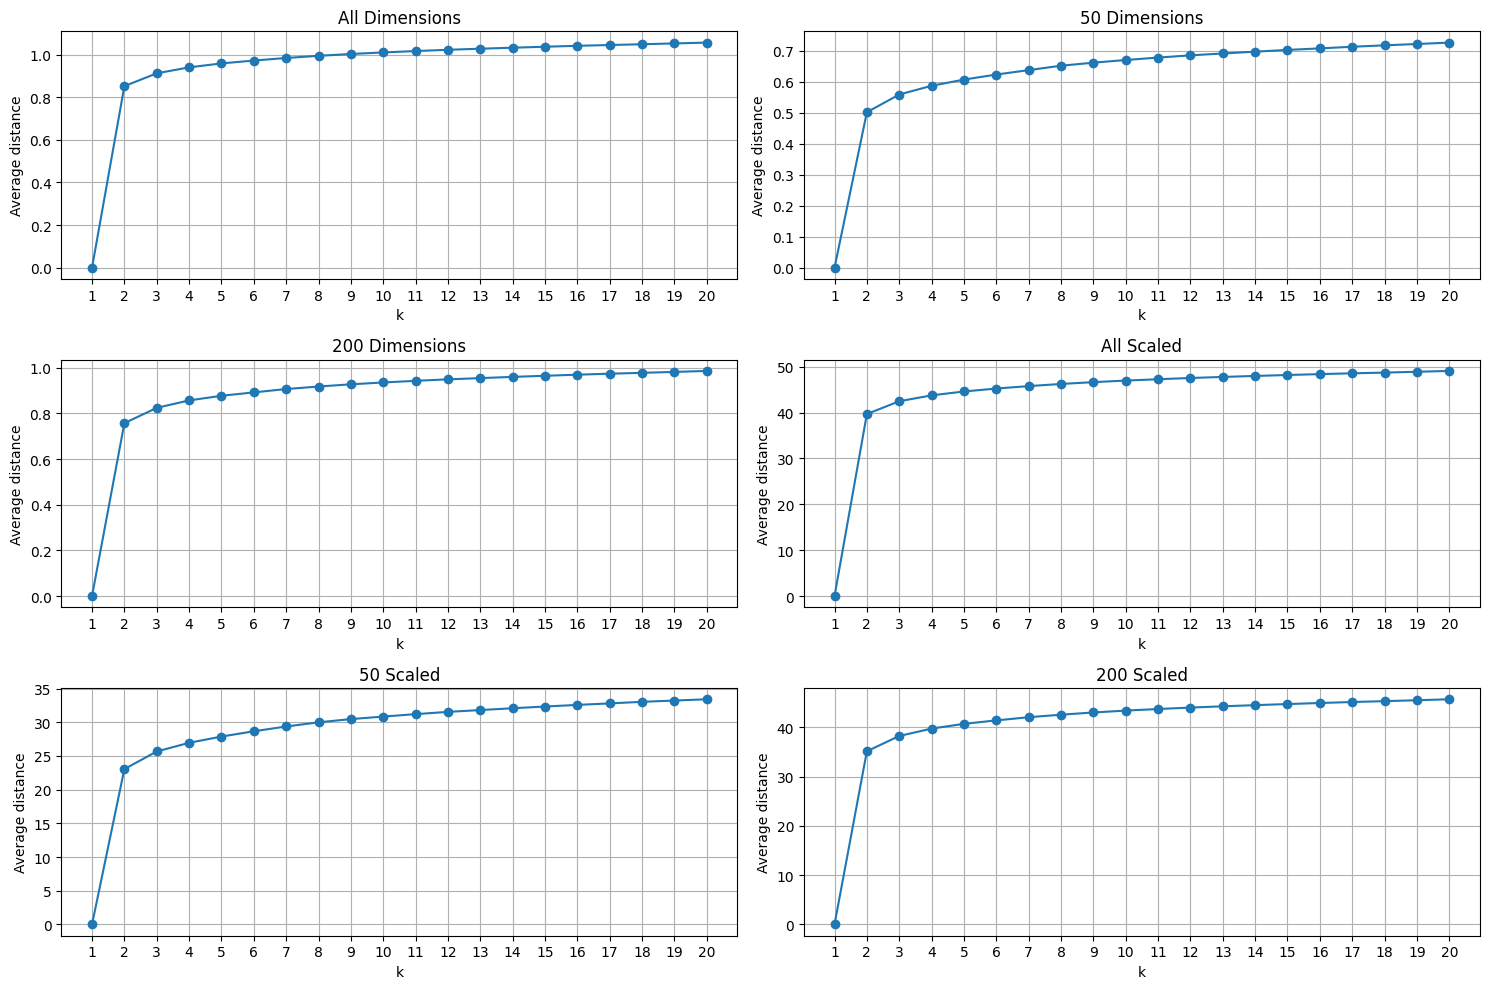

In [ ]:


def find_optimal_k_for_all_embeddings(embeddings_list, titles, max_k=20):
    """
    Plots the average distance to the k-th nearest neighbor for a list of embeddings to help determine the optimal k.

    Parameters:
    embeddings_list (list of array-like): A list of embedding matrices to evaluate.
    titles (list of str): A list of titles corresponding to each embedding matrix for plotting.
    max_k (int, optional): The maximum k value to evaluate. Default is 20.

    Returns:
    None
    """

    num_embeddings = len(embeddings_list)
    num_rows = (num_embeddings + 1) // 2  # Sorgt dafür, dass wir genug Reihen für alle Plots haben

    plt.figure(figsize=(15, 10))  # Größe anpassen für zwei Spalten

    for i, embeddings in enumerate(embeddings_list):
        neigh = NearestNeighbors()
        neigh.fit(embeddings)

        # Für jeden k-Wert die durchschnittliche Distanz zum k-ten nächsten Nachbarn berechnen
        k_distances = []
        for k in range(1, max_k + 1):
            distances, _ = neigh.kneighbors(embeddings, n_neighbors=k)
            k_distances.append(np.mean(distances[:, -1]))

        # Subplot für die aktuelle Einbettung, zwei Spalten pro Reihe
        plt.subplot(num_rows, 2, i + 1)  # Spaltenindex anpassen
        plt.plot(range(1, max_k + 1), k_distances, marker='o')
        plt.title(titles[i])
        plt.xlabel('k')
        plt.ylabel('Average distance')
        plt.xticks(range(1, max_k + 1))
        plt.grid(True)

        k_elbow = np.argmax(np.diff(k_distances)) + 1

    plt.tight_layout()
    plt.show()

# Starten
embeddings_list = [
    embeddings,
    embeddings_50,
    embeddings_200,
    embeddings_scaled,
    embeddings_scaled_50,
    embeddings_scaled_200,
]
titles = ['All Dimensions', '50 Dimensions', '200 Dimensions', 'All Scaled', '50 Scaled', '200 Scaled']

find_optimal_k_for_all_embeddings(embeddings_list, titles)


Suggested min_cluster_size value for All Dimensions based on stabilization point:  2
Suggested min_cluster_size value for 50 Dimensions based on stabilization point:  2
Suggested min_cluster_size value for 200 Dimensions based on stabilization point:  2
Suggested min_cluster_size value for All Scaled based on stabilization point:  3
Suggested min_cluster_size value for 50 Scaled based on stabilization point:  14
Suggested min_cluster_size value for 200 Scaled based on stabilization point:  9


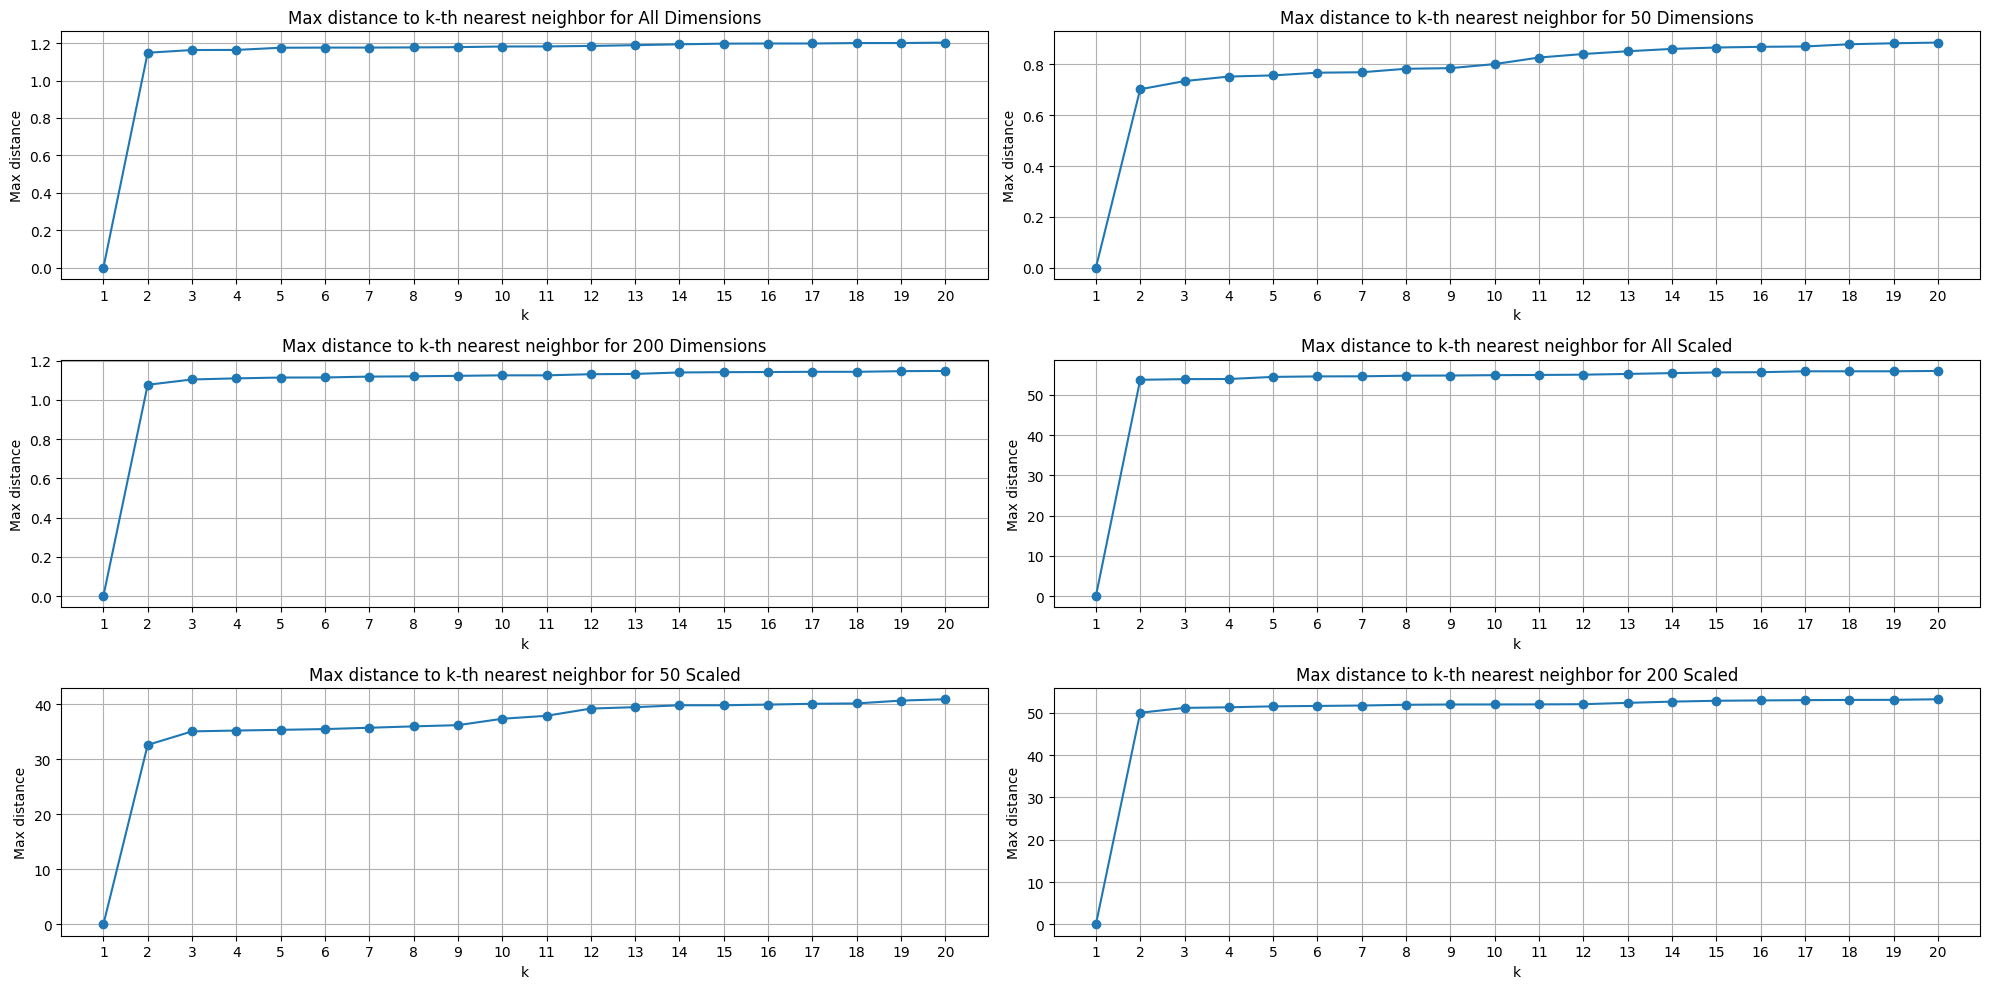

In [ ]:

def find_optimal_min_cluster_size_for_all_embeddings(embeddings_list, titles, max_k=20):
    """
    Plots the maximum distance to the k-th nearest neighbor for a list of embeddings to help determine the optimal
    minimum cluster size for clustering algorithms such as DBSCAN.

    Parameters:
    embeddings_list (list of array-like): A list of embedding matrices to evaluate.
    titles (list of str): A list of titles corresponding to each embedding matrix for plotting.
    max_k (int, optional): The maximum k value to evaluate. Default is 20.

    Returns:
    None
    """
    # Anzahl der Reihen für die Subplots berechnen, jede Reihe hat zwei Plots
    num_embeddings = len(embeddings_list)
    num_rows = (num_embeddings + 1) // 2  # Sorgt dafür, dass wir genug Reihen für alle Plots haben

    plt.figure(figsize=(20, 10))  # Größe anpassen für zwei Spalten

    for i, embeddings in enumerate(embeddings_list):
        neigh = NearestNeighbors()
        neigh.fit(embeddings)

        # Für jeden k-Wert die maximale Distanz zum k-ten nächsten Nachbarn berechnen
        k_distances = []
        for k in range(1, max_k + 1):
            distances, _ = neigh.kneighbors(embeddings, n_neighbors=k)
            k_distances.append(np.max(distances[:, -1]))

        # Subplot für die aktuelle Einbettung, zwei Spalten pro Reihe
        plt.subplot(num_rows, 2, i + 1)  # Spaltenindex anpassen
        plt.plot(range(1, max_k + 1), k_distances, marker='o')
        plt.title(f'Max distance to k-th nearest neighbor for {titles[i]}')
        plt.xlabel('k')
        plt.ylabel('Max distance')
        plt.xticks(range(1, max_k + 1))
        plt.grid(True)

        # Einen Schwellenwert finden, bei dem sich die maximale Distanz stabilisiert
        diffs = np.diff(k_distances)
        min_change_threshold = 0.05  # Setzen Sie einen Schwellenwert für die minimale Änderung
        stable_point = np.where(diffs < min_change_threshold)[0]
        if len(stable_point) > 0:
            min_cluster_size = stable_point[0] + 1  # +1, da np.diff die Länge um 1 reduziert
        else:
            min_cluster_size = max_k  # fallback, falls keine Stabilisierung gefunden wird
        print(f"Suggested min_cluster_size value for {titles[i]} based on stabilization point: ", min_cluster_size)

    plt.tight_layout()
    plt.show()

embeddings_list = [
    embeddings,
    embeddings_50,
    embeddings_200,
    embeddings_scaled,
    embeddings_scaled_50,
    embeddings_scaled_200,
]
titles = ['All Dimensions', '50 Dimensions', '200 Dimensions', 'All Scaled', '50 Scaled', '200 Scaled']

find_optimal_min_cluster_size_for_all_embeddings(embeddings_list, titles)


In [ ]:
# Estimations - used diagram

min_samples_dict = {
    'all': 3,
    '50': 3,
    '200': 3,
    'all_scaled': 4,
    '50_scaled': 5,
    '200_scaled': 5,
}

min_cluster_size_dict = {
    'all': 8,
    '50': 8,
    '200': 10,
    'all_scaled': 14,
    '50_scaled': 4,
    '200_scaled': 10,
}


In [ ]:
# possible entries: kmeans, dbscan, ward, spectral

cluster_results = get_cluster_data(df, embeddings, num_clusters, ['kmeans', 'dbscan', 'spectral', 'ward'], 'all', min_cluster_size_dict, min_samples_dict)
cluster_results_50 = get_cluster_data(df, embeddings_50, num_clusters, ['kmeans', 'dbscan', 'spectral', 'ward'], '50', min_cluster_size_dict, min_samples_dict)
cluster_results_200 = get_cluster_data(df, embeddings_200, num_clusters, ['kmeans', 'dbscan', 'spectral', 'ward'], '200', min_cluster_size_dict, min_samples_dict)

cluster_results_scaled = get_cluster_data(df, embeddings_scaled, num_clusters_scaled, ['kmeans', 'dbscan', 'spectral', 'ward'], 'all_scaled', min_cluster_size_dict, min_samples_dict)
cluster_results_scaled_50 = get_cluster_data(df, embeddings_scaled_50, num_clusters_scaled, ['kmeans', 'dbscan', 'spectral', 'ward'], '50_scaled', min_cluster_size_dict, min_samples_dict)
cluster_results_scaled_200 = get_cluster_data(df, embeddings_scaled_200, num_clusters_scaled, ['kmeans', 'dbscan', 'spectral', 'ward'], '200_scaled', min_cluster_size_dict, min_samples_dict)


kmeans
ALGO:  kmeans
Performing KMeans clustering with 6 clusters.
Completed kmeans clustering with labels stored in kmeans_all.
dbscan
ALGO:  dbscan
Im HDBSCAN clustering mit min_cluster_size: 8 und min_samples: 3
Anzahl der Cluster: 6 mit min_cluster_size = 8 und min_samples = 3
Completed dbscan clustering with labels stored in dbscan_all.
spectral
ALGO:  spectral
im spectral clustering
Silhouette Score for 6 clusters: 0.034930554550380466
Completed spectral clustering with labels stored in spectral_all.
ward
ALGO:  ward
Im hierarchischen Clustering
Completed ward clustering with labels stored in ward_all.
kmeans
ALGO:  kmeans
Performing KMeans clustering with 6 clusters.
Completed kmeans clustering with labels stored in kmeans_50.
dbscan
ALGO:  dbscan
Im HDBSCAN clustering mit min_cluster_size: 8 und min_samples: 3
Anzahl der Cluster: 6 mit min_cluster_size = 8 und min_samples = 3
Completed dbscan clustering with labels stored in dbscan_50.
spectral
ALGO:  spectral
im spectral clust

#### Evaluate Clusters

**** Embeddings - All ****


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

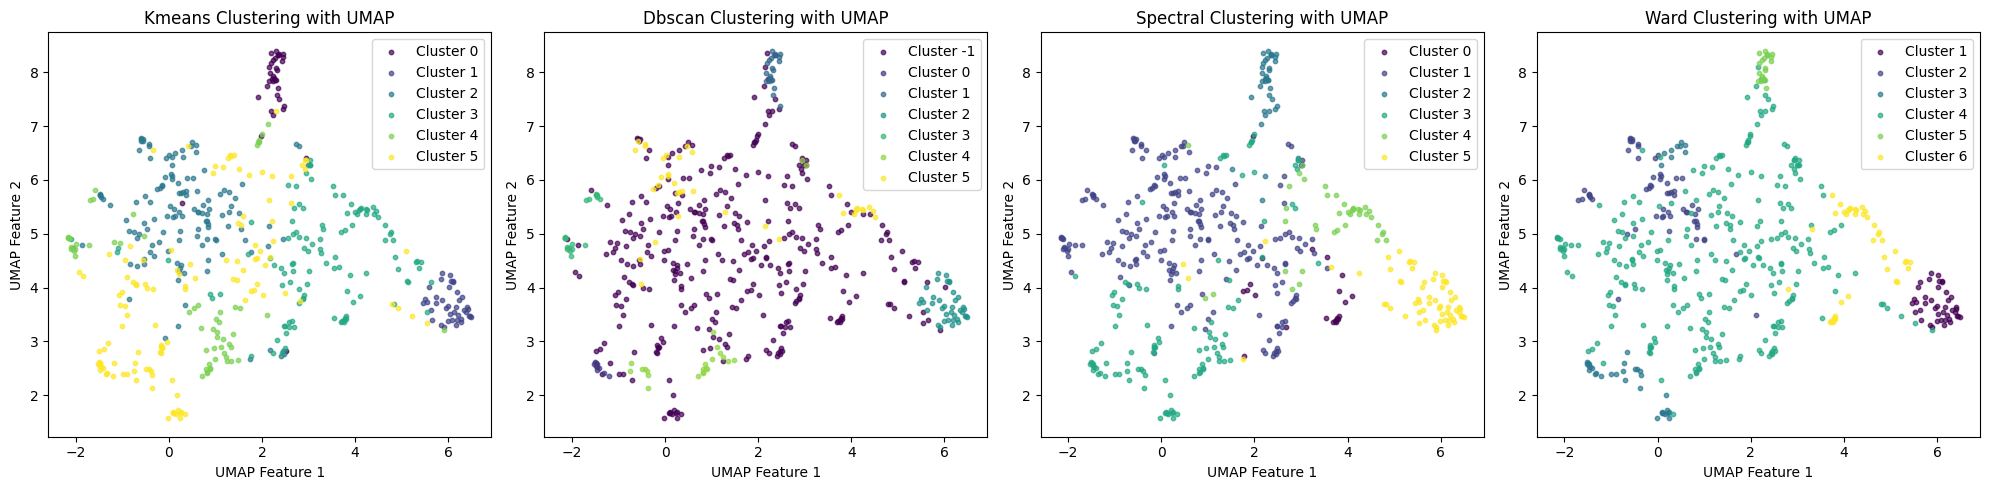

**** Embeddings Scaled - All ****


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

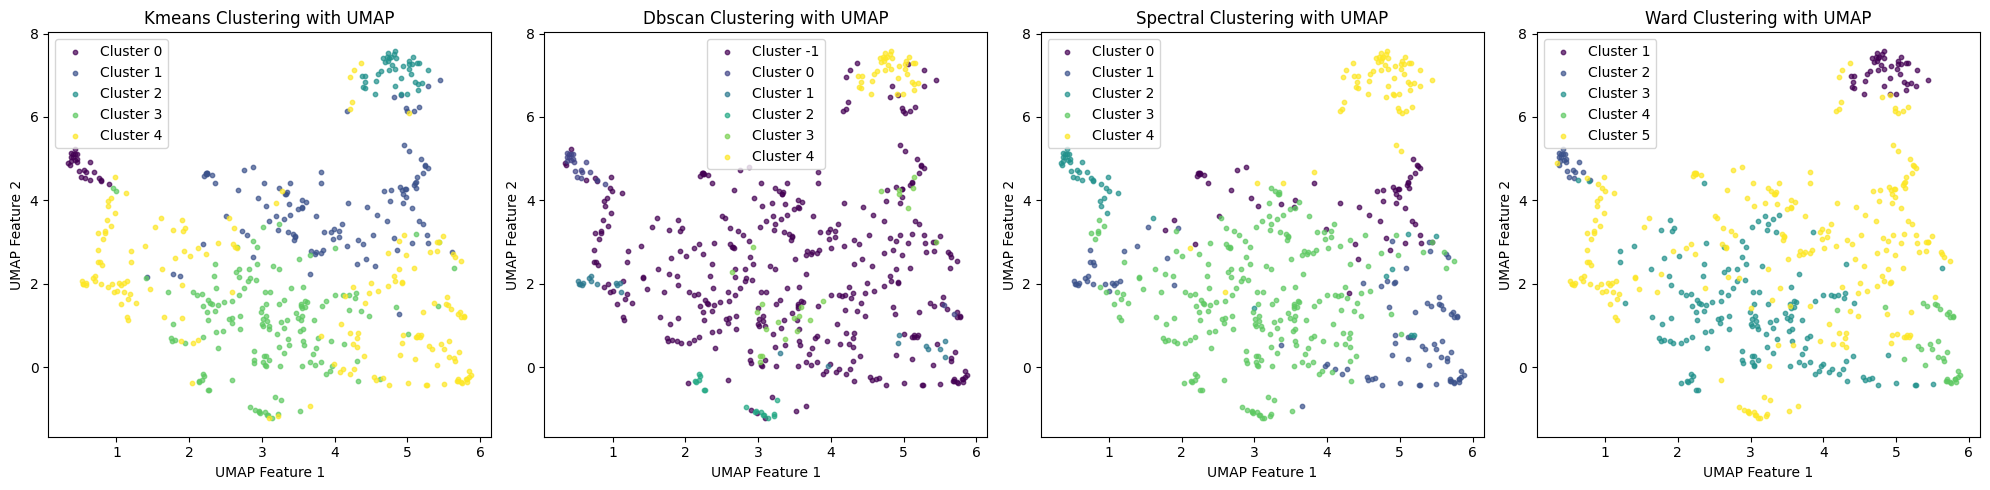

**** Embeddings - 200 Dimensions ****


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

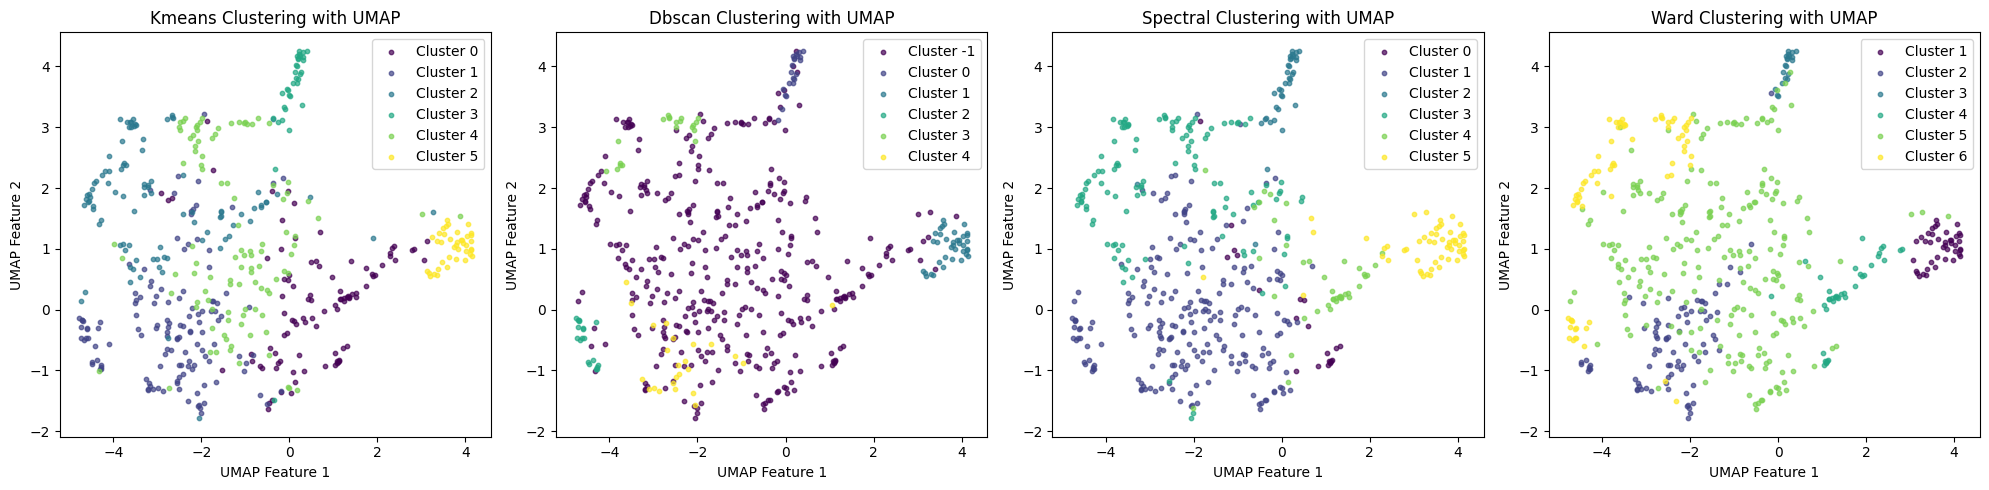

**** Embeddings Scaled - 200 Dimensions ****


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

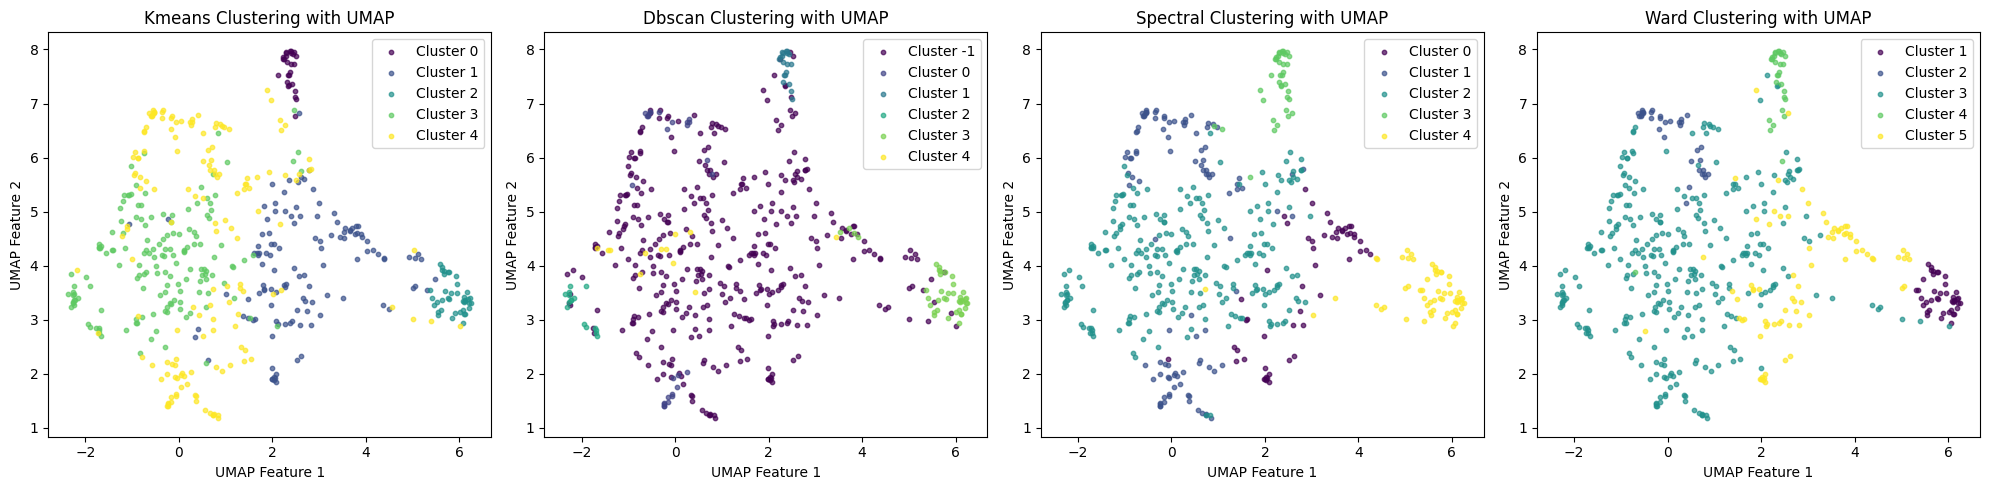

**** Embeddings - 50 Dimensions ****


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

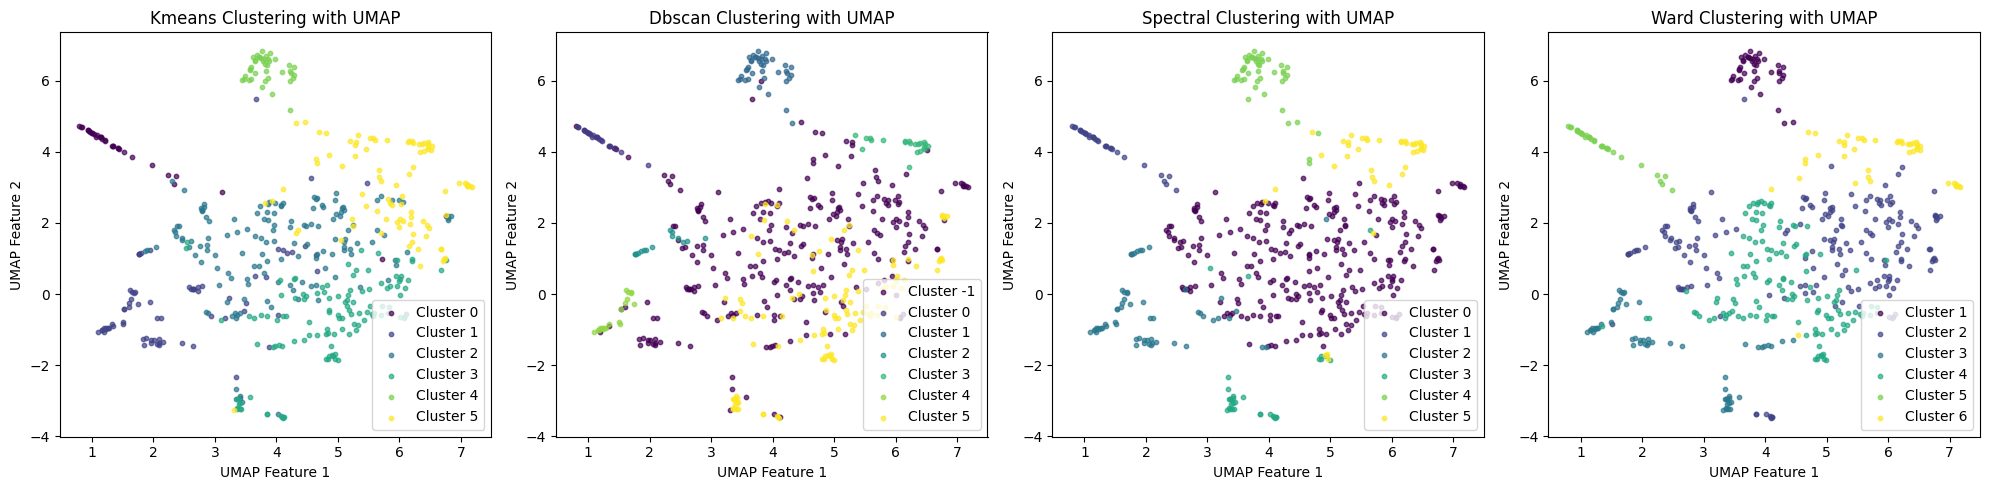

**** Embeddings Scaled - 50 Dimesions ****


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

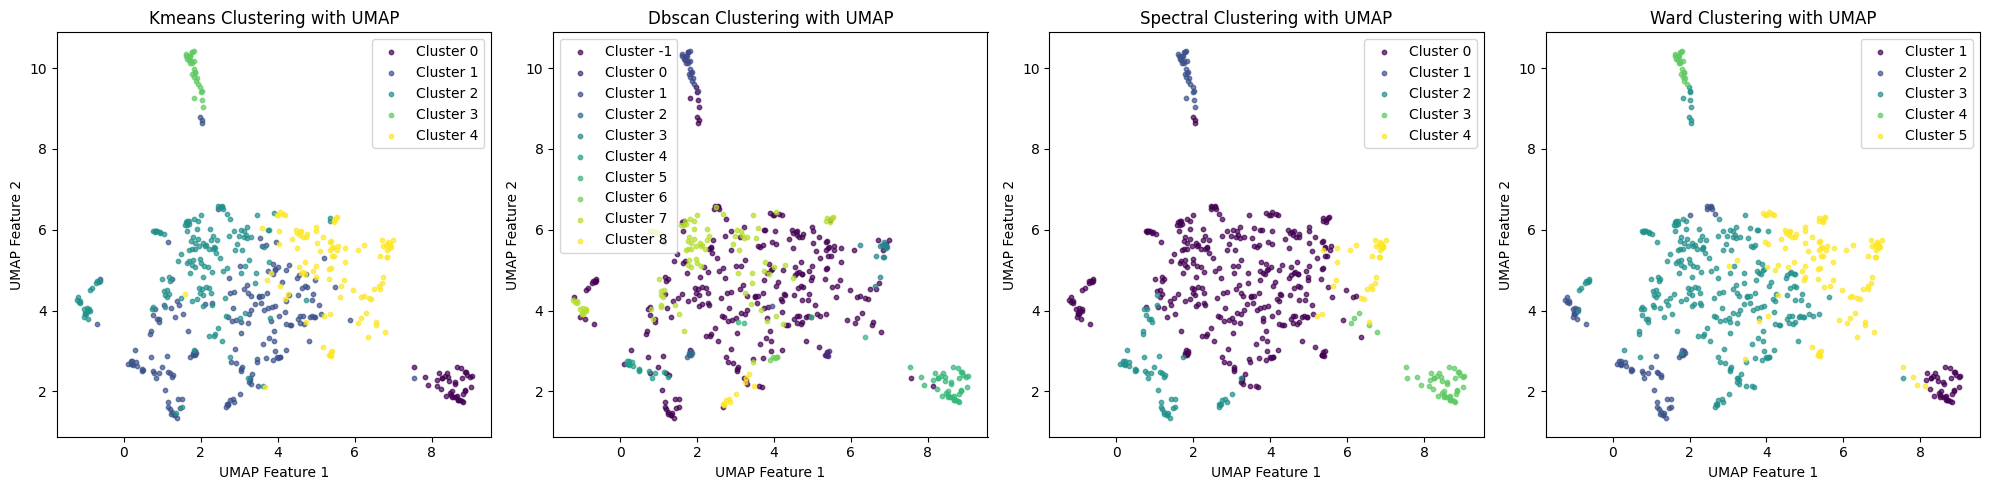

In [ ]:
# Start visualizing clusters
print("**** Embeddings - All ****")
visualize_clusters(embeddings, cluster_results)
print("**** Embeddings Scaled - All ****")
visualize_clusters(embeddings_scaled, cluster_results_scaled)

print("**** Embeddings - 200 Dimensions ****")
visualize_clusters(embeddings_200, cluster_results_200)
print("**** Embeddings Scaled - 200 Dimensions ****")
visualize_clusters(embeddings_scaled_200, cluster_results_scaled_200)

print("**** Embeddings - 50 Dimensions ****")
visualize_clusters(embeddings_50, cluster_results_50)
print("**** Embeddings Scaled - 50 Dimesions ****")
visualize_clusters(embeddings_scaled_50, cluster_results_scaled_50)



In [ ]:
cluster_labels = [
    'kmeans_50', 'dbscan_50', 'spectral_50', 'ward_50',
    'kmeans_200', 'dbscan_200', 'spectral_200', 'ward_200',
    'kmeans_all', 'dbscan_all', 'spectral_all', 'ward_all',
    'kmeans_all_scaled', 'dbscan_all_scaled', 'spectral_all_scaled',
    'ward_all_scaled', 'kmeans_50_scaled', 'dbscan_50_scaled',
    'spectral_50_scaled', 'ward_50_scaled', 'kmeans_200_scaled',
    'dbscan_200_scaled', 'spectral_200_scaled', 'ward_200_scaled'
]

####Evaluate Accuracy and F1

In [ ]:

def calculate_metrics_labeled(df, cluster_col, true_label_col):
    """
    Calculates accuracy and F1 score by mapping cluster labels to actual labels.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cluster_col (str): The column name with cluster labels.
    true_label_col (str): The column name with true labels.

    Returns:
    tuple: A tuple containing accuracy, F1 score, and a dictionary mapping cluster labels to true labels.
    """
    mapped_labels, label_map = map_clusters_to_actual_labels(df, cluster_col, true_label_col)
    accuracy = accuracy_score(df[true_label_col], mapped_labels)
    f1 = f1_score(df[true_label_col], mapped_labels, average='weighted')
    return accuracy, f1, label_map


def map_clusters_to_actual_labels(df, cluster_label_col, true_label_col):
    """
    Maps clusters to actual labels by finding the most frequent true label in each cluster.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    cluster_label_col (str): The column name with cluster labels.
    true_label_col (str): The column name with true labels.

    Returns:
    tuple: A tuple containing a Series of mapped labels and a dictionary mapping cluster labels to true labels.
    """

    cluster_mode_labels = df.groupby(cluster_label_col)[true_label_col].agg(lambda x: x.mode().iloc[0]).reset_index()
    cluster_mode_labels.columns = [cluster_label_col, 'mode_label']
    df = pd.merge(df, cluster_mode_labels, on=cluster_label_col, how='left')
    return df['mode_label'], cluster_mode_labels.set_index(cluster_label_col)['mode_label'].to_dict()


results = []
for label in cluster_labels:
    accuracy, f1, _ = calculate_metrics_labeled(df, label, 'category')  # 'category' ist das wahre Label
    results.append({
        'Method': label,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

# printing results for each cluster-embedding-combination
results_df = pd.DataFrame(results)
results_df


Method  Accuracy  F1 Score
0             kmeans_50  0.793587  0.741358
1             dbscan_50  0.763527  0.702704
2           spectral_50  0.779559  0.724519
3               ward_50  0.777555  0.722763
4            kmeans_200  0.787575  0.736659
5            dbscan_200  0.721443  0.645460
6          spectral_200  0.785571  0.733217
7              ward_200  0.773547  0.717677
8            kmeans_all  0.773547  0.726431
9            dbscan_all  0.721443  0.645460
10         spectral_all  0.771543  0.720564
11             ward_all  0.777555  0.722128
12    kmeans_all_scaled  0.785571  0.736963
13    dbscan_all_scaled  0.719439  0.642494
14  spectral_all_scaled  0.773547  0.721999
15      ward_all_scaled  0.729459  0.657051
16     kmeans_50_scaled  0.789579  0.739633
17     dbscan_50_scaled  0.751503  0.690376
18   spectral_50_scaled  0.783567  0.727310
19       ward_50_scaled  0.781563  0.732553
20    kmeans_200_scaled  0.773547  0.727913
21    dbscan_200_scaled  0.727455  0.654193
22  spectral_200_scaled  0.783567  0.730992
23      ward_200_scaled  0.771543  0.719735

#### Generate Labels (Wordclouds & LLM)

In [ ]:
def generate_wordclouds_for_algorithm(axes, df, text_column, label_column, exclude_words=None):
    unique_labels = df[label_column].unique()
    if len(unique_labels) == 1:
        axes = np.array([axes])  # Ensure axes is always a numpy array

    for idx, label in enumerate(unique_labels):
        # Get texts, convert to lower case, and combine into one large string
        combined_text = " ".join(df[df[label_column] == label][text_column].dropna().str.lower())

        # Exclude unwanted words
        for word in exclude_words:
            combined_text = combined_text.replace(word.lower(), "")  # Ensure to remove words in lower case

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

        ax = axes.flatten()[idx]  # Flatten the axes array and get the current axis
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        ax.set_title(f"Cluster: {label} - {label_column}")

    # Hide any unused axes
    for ax in axes.flatten()[len(unique_labels):]:
        ax.axis("off")

def create_and_display_wordclouds(df, text_column, cluster_labels, exclude_words):
    """
    Generates word clouds for each unique label in the specified label column.

    Parameters:
    axes (array-like): Array of matplotlib axes for plotting the word clouds.
    df (DataFrame): The DataFrame containing the data.
    text_column (str): The name of the column containing the text data.
    label_column (str): The name of the column containing the cluster labels.
    exclude_words (set, optional): A set of words to exclude from the word clouds.

    Returns:
    None
    """
    print("******** Start Creating Wordclouds ********")
    for label_column in cluster_labels:
        num_labels = df[label_column].nunique()

        # Calculate the number of rows needed, with a max of 2 columns
        num_rows = (num_labels + 1) // 2
        fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
        fig.suptitle(f"Word Clouds for {label_column}", fontsize=16)

        generate_wordclouds_for_algorithm(axes, df, text_column, label_column, exclude_words)
        plt.tight_layout()
        plt.show()
    print("Wordclouds created.")
    print("---------------------------------------")

# Define the words to exclude (now only in lowercase)
words_to_exclude = {'support', 'reported', 'problem', 'category', 'summary', 'user', 'affected systems', 'reported problem', 'issue', 'system', 'affected'}

create_and_display_wordclouds(df, 'reworked_text', cluster_labels, exclude_words=words_to_exclude)


In [ ]:
def extract_top_words_per_cluster_all_algorithms_2(df, text_column, cluster_label_columns):
    """
    Extracts the top words for each cluster across multiple clustering algorithms using TF-IDF.

    Parameters:
    df (DataFrame): The DataFrame containing the text data and cluster labels.
    text_column (str): The name of the column containing the text data.
    cluster_label_columns (list of str): A list of column names containing the cluster labels.

    Returns:
    dict: A dictionary with cluster label columns as keys and dictionaries of top words per cluster as values.
    """
    top_words_all_algorithms = {}

    for cluster_label_column in cluster_label_columns:
        print(f"Processing {cluster_label_column}")
        unique_clusters = df[cluster_label_column].unique()
        top_words_per_cluster = {}

        for cluster_num in unique_clusters:
            cluster_data = df[df[cluster_label_column] == cluster_num][text_column].dropna()
            if cluster_data.empty:
                top_words_per_cluster[cluster_num] = []
                continue

            tfidf_vectorizer = TfidfVectorizer(stop_words='english')
            tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data)
            feature_array = np.array(tfidf_vectorizer.get_feature_names_out())
            tfidf_sorting = np.argsort(tfidf_matrix.mean(axis=0)).flatten()[::-1]

            top_n = 5
            top_words = feature_array[tfidf_sorting][:top_n]
            top_words_per_cluster[cluster_num] = top_words.tolist()

        top_words_all_algorithms[cluster_label_column] = top_words_per_cluster

    return top_words_all_algorithms

In [ ]:

def extract_top_words_per_cluster_all_algorithms(df, text_column, cluster_label_columns, words_to_exclude):
    """
    Extracts the top words for each cluster across multiple clustering algorithms using a count vectorizer.

    Parameters:
    df (DataFrame): The DataFrame containing the text data and cluster labels.
    text_column (str): The name of the column containing the text data.
    cluster_label_columns (list of str): A list of column names containing the cluster labels.
    words_to_exclude (set): A set of words to exclude from the top words extraction.

    Returns:
    dict: A dictionary with cluster label columns as keys and dictionaries of top words per cluster as values.
    """
    top_words = defaultdict(dict)

    for column in cluster_label_columns:
        cluster_labels = df[column].unique()
        for cluster in cluster_labels:
            if cluster == -1:  # Assuming -1 is noise for DBSCAN
                continue
            cluster_texts = df[df[column] == cluster][text_column].values
            vectorizer = CountVectorizer(stop_words='english')
            word_counts = vectorizer.fit_transform(cluster_texts)
            sum_words = word_counts.sum(axis=0)
            words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items() if word not in words_to_exclude]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            top_words[column][cluster] = [word for word, _ in words_freq[:5]]  # Take the top 5 words

    return top_words

cluster_label_columns = [f"{algo}" for algo in cluster_labels]


top_words = extract_top_words_per_cluster_all_algorithms(df, 'reworked_text', cluster_label_columns, words_to_exclude)

cluster_data = []
for algo, clusters in top_words.items():
    for cluster_num, words in clusters.items():
        cluster_data.append({
            'Algorithm': algo.replace('_label', ''),
            'Cluster': cluster_num,
            'TopWords': words
        })

cluster_df = pd.DataFrame(cluster_data)

# Display the top words in a nicer format
from tabulate import tabulate


In [ ]:

def display_top_words_tabular(cluster_df):
    """
    Displays the top words for each cluster in a tabular format for each algorithm.

    Parameters:
    cluster_df (DataFrame): The DataFrame containing the top words for each cluster of each algorithm.

    Returns:
    None
    """
    # Unique algorithms to determine the number of rows needed
    algorithms = cluster_df['Algorithm'].unique()

    for algo in algorithms:
        print(f"\033[1mTop Words for {algo} Clusters:\033[0m")  # Bold title
        algo_data = cluster_df[cluster_df['Algorithm'] == algo]
        clusters = algo_data['Cluster'].unique()
        # Create header with cluster numbers
        headers = ['Cluster ' + str(cluster) for cluster in clusters]
        # Initialize dictionary to hold words for each cluster
        cluster_words = {header: [] for header in headers}

        for cluster in clusters:
            words = algo_data[algo_data['Cluster'] == cluster]['TopWords'].values[0]
            cluster_words['Cluster ' + str(cluster)].extend(words)

        # Create rows for words
        rows = []
        max_length = max(len(words) for words in cluster_words.values())
        for i in range(max_length):
            row = []
            for header in headers:
                try:
                    row.append(cluster_words[header][i])
                except IndexError:
                    row.append("")
            rows.append(row)

        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))
        print("\n")

display_top_words_tabular(cluster_df)


Top Words for kmeans_50 Clusters:
╒═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ Cluster 1   │ Cluster 2   │ Cluster 0   │ Cluster 5   │ Cluster 4   │ Cluster 3   │
╞═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ unable      │ unable      │ description │ device      │ po          │ access      │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ card        │ mailbox     │ technical   │ monitor     │ purchase    │ unable      │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ form        │ request     │ unable      │ printer     │ allocation  │ requests    │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ access      │ change      │ understand  │ request     │ new         │ rights      │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ time        │ clie

In [ ]:
def create_gpt3_labels(top_words_list):
    """
    Generates a distinct, one-word label for a list of top words using OpenAI's GPT-3.5-turbo model.

    Parameters:
    top_words_list (list of str): A list of top words to be used for generating the label.

    Returns:
    list of str: A list containing the generated label.
    """
    cluster_labels = []
    top_words_str = " ".join(top_words_list)
    prompt = (
        "Generate a distinct, one-word label. Aim for labels that would clearly categorize "
        "issues or features for easy ticket classification. Be as concrete as possible."
    )
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": top_words_str}
        ]
    )
    new_label = response['choices'][0]['message']['content'].strip()
    cluster_labels.append(new_label)
    return cluster_labels


In [ ]:
# print the DataFrame with the generated Cluster-Labels
cluster_df['GPT_Label'] = cluster_df['TopWords'].apply(create_gpt3_labels)
print("Labels generated for data.")
print(display(cluster_df[['Algorithm', 'Cluster', 'TopWords', 'GPT_Label']]))

Labels generated for data.


Algorithm  Cluster  \
0          kmeans_50        1   
1          kmeans_50        2   
2          kmeans_50        0   
3          kmeans_50        5   
4          kmeans_50        4   
..               ...      ...   
130  ward_200_scaled        2   
131  ward_200_scaled        3   
132  ward_200_scaled        4   
133  ward_200_scaled        5   
134  ward_200_scaled        1   

                                              TopWords         GPT_Label  
0                   [unable, card, form, access, time]     [AccessError]  
1           [unable, mailbox, request, change, client]   [Configuration]  
2    [description, technical, unable, understand, p...         [Clarity]  
3          [device, monitor, printer, request, access]      [Permission]  
4            [po, purchase, allocation, new, receipts]      [Allocation]  
..                                                 ...               ...  
130                [card, time, unable, access, cards]          [Access]  
131         [access, unable, needs, request, requests]  [Accessibililty]  
132  [description, technical, unable, understand, p...         [Clarity]  
133       [monitor, device, network, request, printer]      [Monitoring]  
134          [po, purchase, allocation, new, receipts]      [Allocation]  

[135 rows x 4 columns]

None


In [ ]:
# print the generated Labels for selected embedding
filtered_df = cluster_df[cluster_df['Algorithm'] == 'spectral_200_scaled']
print(display(filtered_df[['Algorithm', 'Cluster', 'TopWords', 'GPT_Label']]))


Algorithm  Cluster  \
125  spectral_200_scaled        1   
126  spectral_200_scaled        2   
127  spectral_200_scaled        3   
128  spectral_200_scaled        4   
129  spectral_200_scaled        0   

                                              TopWords        GPT_Label  
125            [unable, mailbox, card, leaver, access]         [Access]  
126         [access, unable, request, needs, requests]   [AccessDenied]  
127  [technical, unable, description, understand, p...  [clarification]  
128          [po, purchase, allocation, new, receipts]     [Allocation]  
129      [monitor, device, printer, requests, details]       [Tracking]

None


In [ ]:
# write generated label into the corresponding rows
for algo in cluster_df['Algorithm'].unique():
    mapping = cluster_df[cluster_df['Algorithm'] == algo].set_index('Cluster')['GPT_Label'].to_dict()
    scaled_column = f'{algo}_scaled'

    # Does column exist?
    if scaled_column in df.columns:
        df[f'{algo}_label'] = df[scaled_column].map(mapping)

In [ ]:
# Selecting random rows to check by eye, if they are acceptable.
df_labelchecker = df[['reworked_text', 'spectral_50_label' ,	'ward_50_label', 	'kmeans_200_label', 	'dbscan_200_label', 	'spectral_200_label', 	'ward_200_label', 	'kmeans_all_label', 	'dbscan_all_label', 	'spectral_all_label' ,	'ward_all_label']]
zufaellige_zeilen = df_labelchecker.sample(n=384, random_state=42)


In [ ]:
zufaellige_zeilen.head(3)

reworked_text spectral_50_label  \
460  unable to update sow link in va deal contract....      [Permission]   
73   new purchase po for 1 inch wide monitor type, ...  [Authentication]   
231      found lost card in backpack, sent to va care.          [Access]   

        ward_50_label  kmeans_200_label dbscan_200_label spectral_200_label  \
460  [Authentication]  [Authentication]              NaN    [clarification]   
73       [Allocation]   [Accessibility]      [Maternity]         [Hardware]   
231     [AccessError]  [Authentication]              NaN       [Permission]   

    ward_200_label  kmeans_all_label dbscan_all_label spectral_all_label  \
460      [Clarity]  [Authentication]              NaN           [Access]   
73    [Allocation]    [Access issue]      [Maternity]        [equipment]   
231  [Permissions]  [Authentication]              NaN     [AccessDenied]   

    ward_all_label  
460  [Permissions]  
73    [Allocation]  
231  [Permissions]

In [ ]:
def calculate_metrics(embeddings, cluster_results):
    """
    Calculates clustering performance metrics for various clustering methods.

    Parameters:
    embeddings (array-like): The input embeddings.
    cluster_results (dict): A dictionary with clustering method names as keys and cluster labels as values.

    Returns:
    dict: A dictionary with clustering method names as keys and a dictionary of metrics as values.
    """
    metrics = {}
    for method, labels in cluster_results.items():
        valid_indices = ~np.isnan(labels)
        valid_labels = labels[valid_indices]
        valid_embeddings = embeddings[valid_indices]

        n_labels = len(np.unique(valid_labels))
        if 1 < n_labels < len(valid_labels):
            silhouette = silhouette_score(valid_embeddings, valid_labels)
            davies_bouldin = davies_bouldin_score(valid_embeddings, valid_labels)
            calinski_harabasz = calinski_harabasz_score(valid_embeddings, valid_labels)
            metrics[method] = {
                'Silhouette': silhouette,
                'Davies-Bouldin': davies_bouldin,
                'Calinski-Harabasz': calinski_harabasz
            }
        else:
            metrics[method] = {
                'Silhouette': None,
                'Davies-Bouldin': None,
                'Calinski-Harabasz': None
            }
    return metrics

def plot_metrics(metrics):
    """
    Plots clustering performance metrics.

    Parameters:
    metrics (dict): A dictionary with clustering method names as keys and a dictionary of metrics as values.

    Returns:
    None
    """
    # Umwandlung des Dictionaries in ein DataFrame
    df_results = pd.DataFrame(metrics).T

    # Plotten der Ergebnisse
    fig, ax = plt.subplots(figsize=(12, 8))
    df_results.plot(kind='bar', ax=ax, width=0.75, edgecolor='black')  # Balkenbreite reduzieren und Rand hinzufügen
    plt.title('Clustering Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(title='Metrics')

    # Balken mit Schatten versehen
    for container in ax.containers:
        plt.setp(container, linewidth=0.5, edgecolor='black')
        for bar in container:
            bar.set_zorder(2)  # Balken vor den Gitterlinien zeichnen
            bar.set_path_effects([path_effects.withSimplePatchShadow()])  # Schatten hinzufügen

    plt.show()

    # Drucken der expliziten Werte
    print("\nExplicit values for each variable:")
    for method, scores in metrics.items():
        print(f"\n{method}:")
        for metric, score in scores.items():
            if score is not None:
                print(f"  {metric}: {score:.4f}")
            else:
                print(f"  {metric}: Not applicable (not enough clusters)")


def plot_metrics_comparison(metrics_list, labels):
    """
    Plots comparison of clustering performance metrics across multiple runs.

    Parameters:
    metrics_list (list): A list of dictionaries containing clustering metrics for different runs.
    labels (list): A list of labels for each run.

    Returns:
    None
    """
    df_list = []
    for i, metrics in enumerate(metrics_list):
        df = pd.DataFrame(metrics).T
        df['Run'] = labels[i]
        df_list.append(df)

    df_combined = pd.concat(df_list)
    df_combined = df_combined.reset_index().melt(id_vars=['index', 'Run'], var_name='Metric', value_name='Score')

    unique_metrics = df_combined['Metric'].unique()
    num_metrics = len(unique_metrics)

    # Subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.4)

    silhouette_ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)

    # Plot
    silhouette_data = df_combined[df_combined['Metric'] == 'Silhouette']
    silhouette_data.pivot(index='index', columns='Run', values='Score').plot(kind='bar', ax=silhouette_ax, width=0.75, edgecolor='black')
    silhouette_ax.set_title('Silhouette Comparison Across Runs')
    silhouette_ax.set_ylabel('Score')
    silhouette_ax.set_xlabel('Clusters')
    silhouette_ax.legend(title='Run', loc='lower right')
    silhouette_ax.set_xticklabels(silhouette_ax.get_xticklabels(), rotation=0)
    silhouette_ax.set_ylim(-1, 1)

    for container in silhouette_ax.containers:
        plt.setp(container, linewidth=0.5, edgecolor='black')
        for bar in container:
            bar.set_zorder(2)
            bar.set_path_effects([path_effects.withSimplePatchShadow()])
            height = bar.get_height()
            silhouette_ax.annotate(f'{height:.2f}',
                                   xy=(bar.get_x() + bar.get_width() / 2, height),
                                   xytext=(0, 3),  # 3 points vertical offset
                                   textcoords="offset points",
                                   ha='center', va='bottom')

    remaining_metrics = [metric for metric in unique_metrics if metric != 'Silhouette']
    for ax, metric in zip([axes[1, 0], axes[1, 1]], remaining_metrics):
        metric_data = df_combined[df_combined['Metric'] == metric]
        metric_data.pivot(index='index', columns='Run', values='Score').plot(kind='bar', ax=ax, width=0.75, edgecolor='black')
        ax.set_title(f'{metric} Comparison Across Runs')
        ax.set_ylabel('Score')
        ax.set_xlabel('Clusters')
        ax.legend(title='Run', loc='lower right')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

        for container in ax.containers:
            plt.setp(container, linewidth=0.5, edgecolor='black')
            for bar in container:
                bar.set_zorder(2)
                bar.set_path_effects([path_effects.withSimplePatchShadow()])
                height = bar.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Print explicit values for each run in a readable format
    print("\nExplicit values for each run:")
    for label, df in zip(labels, df_list):
        df = df.drop(columns=['Run'])
        print(f"\n{label}\n")
        print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=True))
        print("\n")

Oveview about all current clusters

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

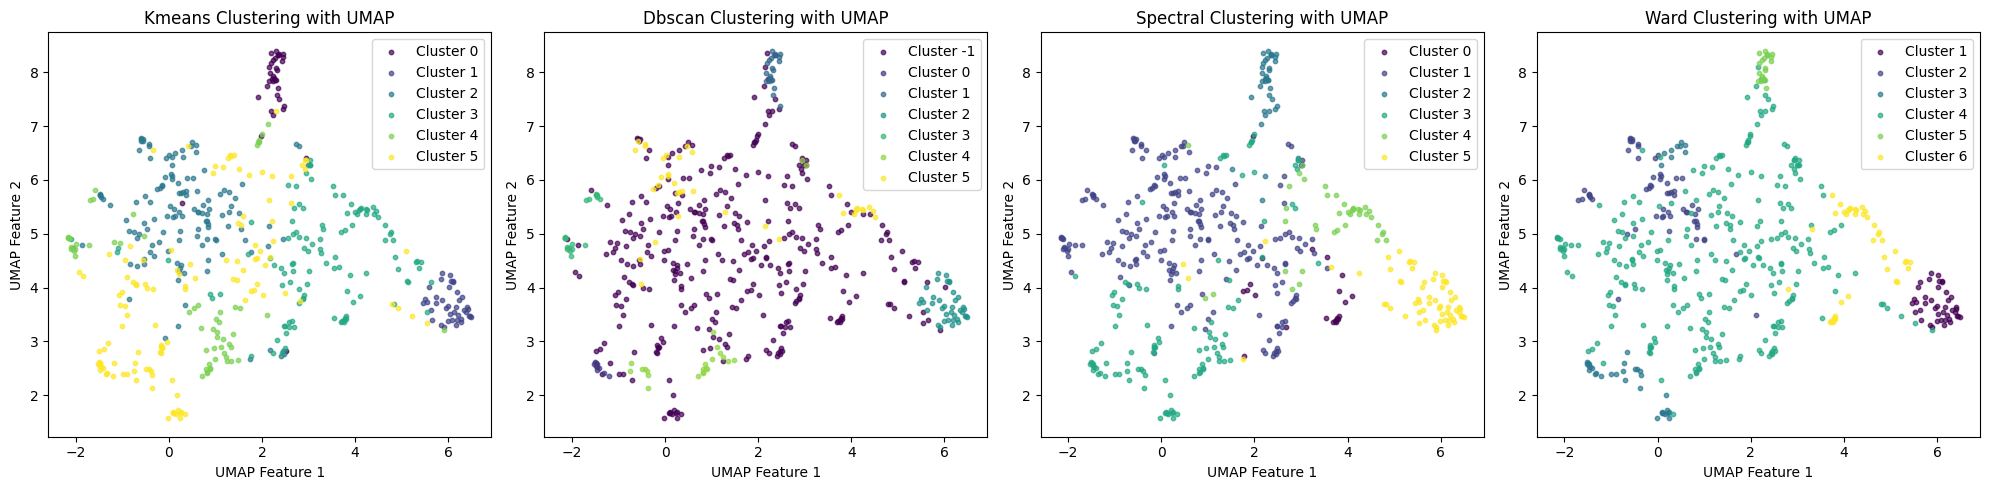

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

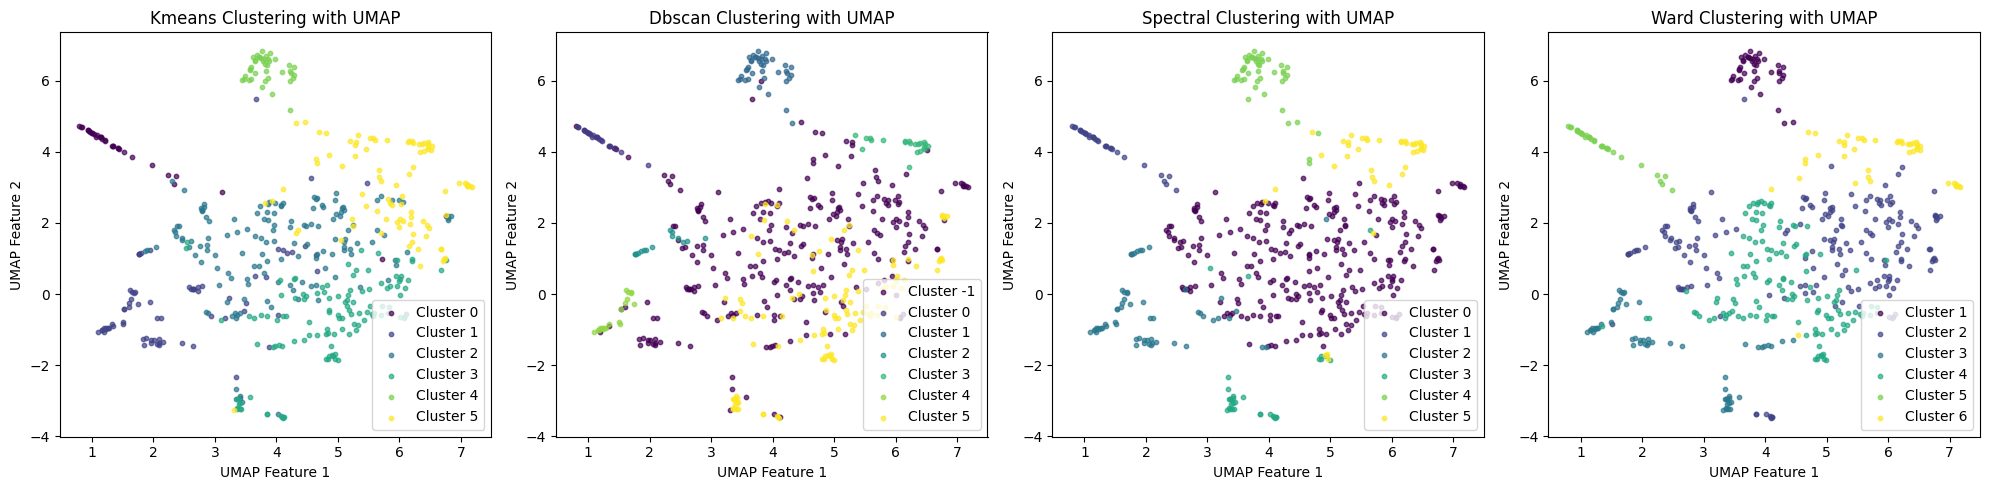

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

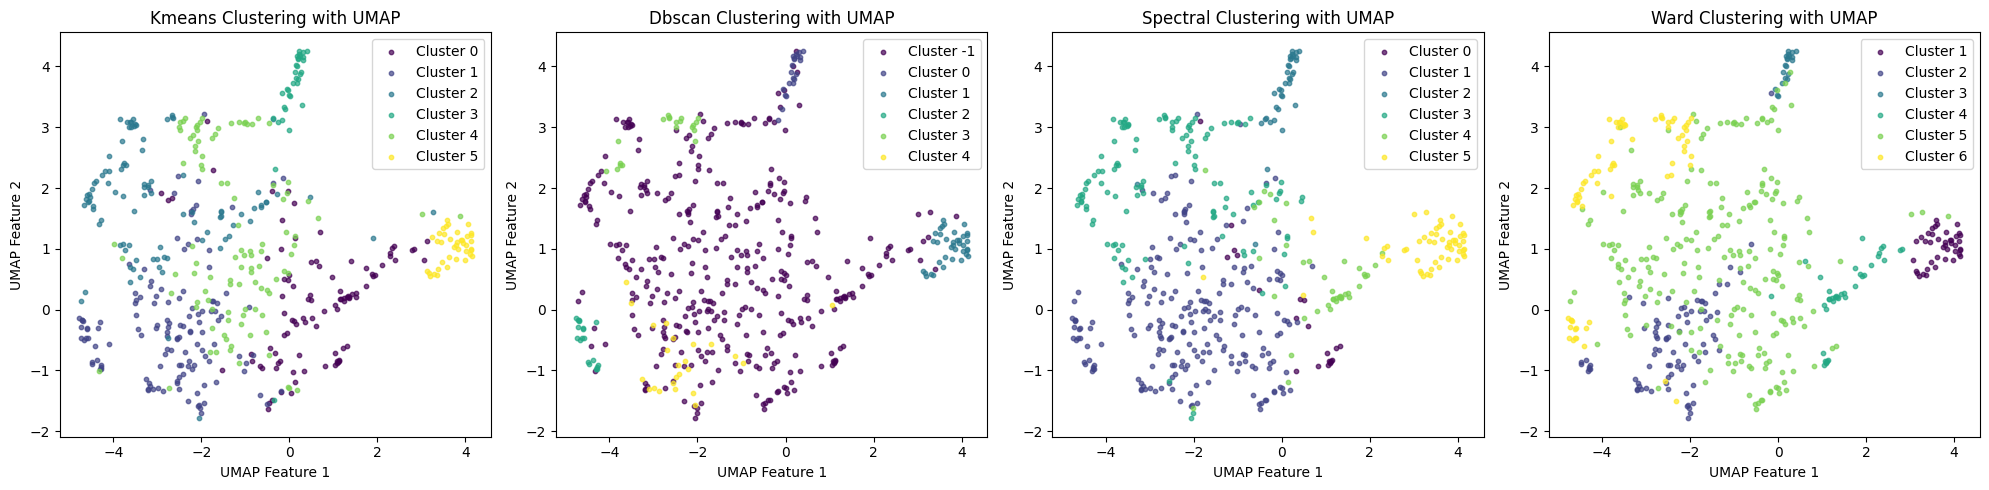

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

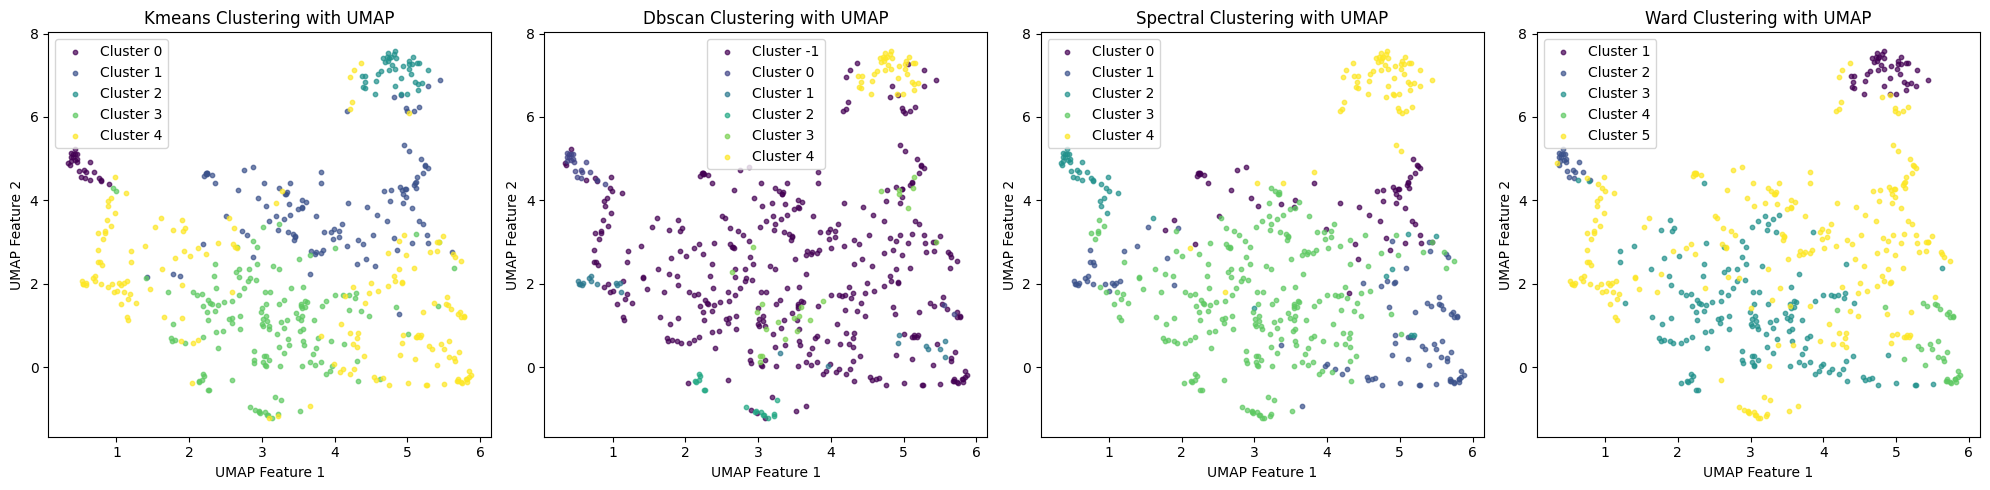

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

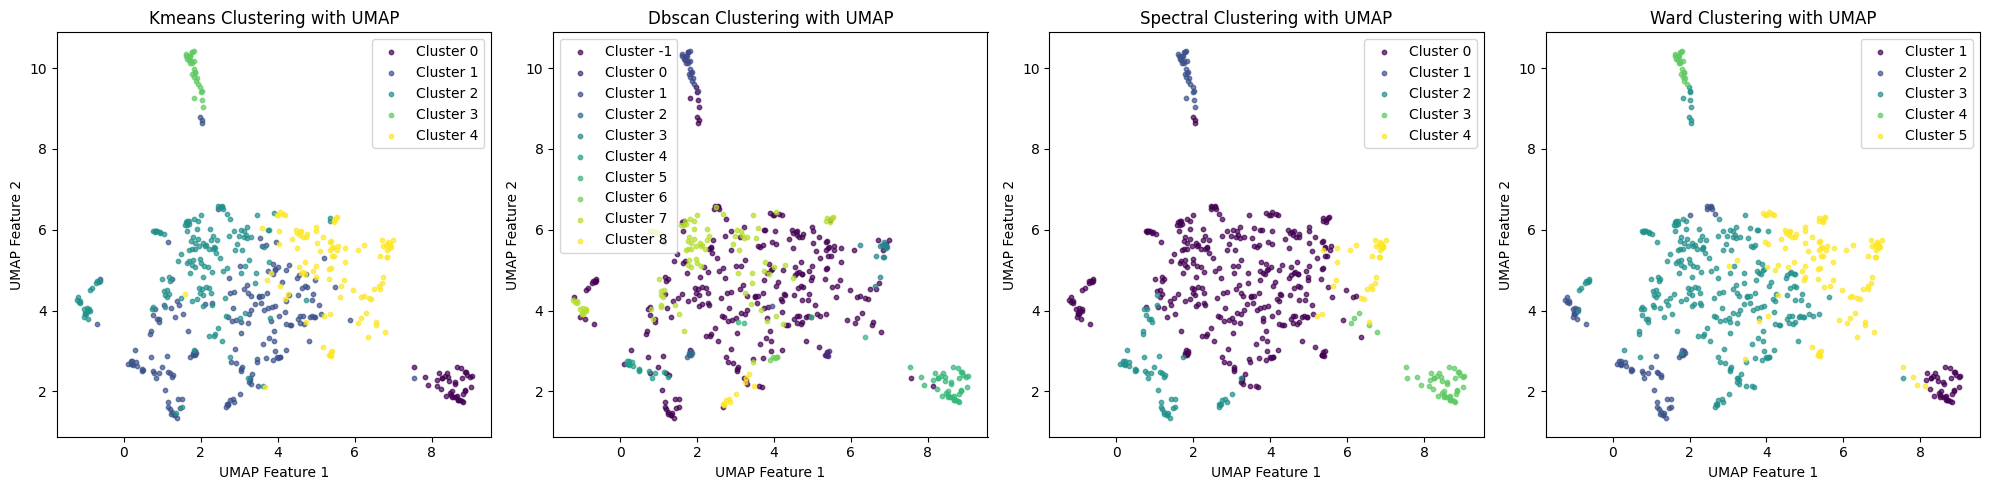

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

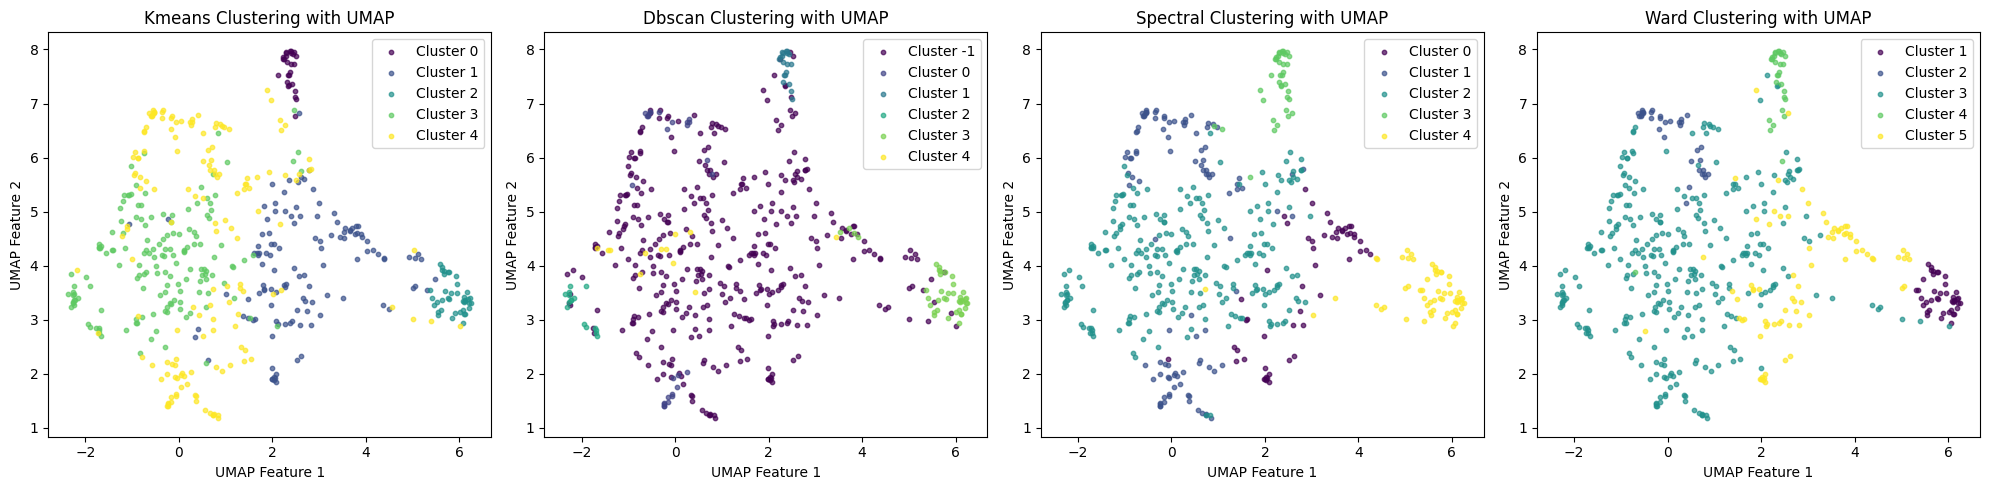

In [ ]:
# Visualize the clusters
visualize_clusters(embeddings, cluster_results, cluster_labels)
visualize_clusters(embeddings_50, cluster_results_50, cluster_labels)
visualize_clusters(embeddings_200, cluster_results_200, cluster_labels)
visualize_clusters(embeddings_scaled, cluster_results_scaled, cluster_labels)
visualize_clusters(embeddings_scaled_50, cluster_results_scaled_50, cluster_labels)
visualize_clusters(embeddings_scaled_200, cluster_results_scaled_200, cluster_labels)


### Adding New Tickets

In [ ]:
def get_openai_embeddings_addon(text, dimension=None):
    """
    Retrieves a new embedding for the given text using OpenAI's embedding model. Optionally reduces the dimensionality using PCA.

    Parameters:
    text (str): The input text for which to generate the embedding.
    dimension (int, optional): The target dimension for PCA. If None, PCA is not applied.

    Returns:
    np.ndarray: The processed embedding for the given text, always as a 2D array.
    """
    try:
        response = openai.Embedding.create(input=text, engine="text-embedding-3-small")
        new_embedding = np.array(response['data'][0]['embedding']).reshape(1, -1)
    except Exception as e:
        print(f"Failed to retrieve embedding for text: {text}. Error: {e}")
        return None

    if dimension is not None:
        # Stack the new embedding with the existing ones (PCA needs that)
        combined_embeddings = np.vstack([embeddings, new_embedding])
        pca = PCA(n_components=dimension)
        scaler = StandardScaler()
        new_embedding = scaler.fit_transform(combined_embeddings)
        reduced_embeddings = pca.fit_transform(combined_embeddings)
        new_embedding = reduced_embeddings[-1].reshape(1, -1)
        return new_embedding
    else:
        return new_embedding


In [ ]:
# Helpers for adding ticket afterward to each cluster-embedding-combination
common_columns = ['issue_title', 'issue_description', 'category', 'combined_text', 'reworked_text', 'combined_texts']

df_50_columns = common_columns + ['kmeans_50', 'dbscan_50', 'spectral_50', 'ward_50']
df_200_columns = common_columns + ['kmeans_200', 'dbscan_200', 'spectral_200', 'ward_200']
df_all_columns = common_columns + ['kmeans_all', 'dbscan_all', 'spectral_all', 'ward_all']
df_scaled_50_columns = common_columns + ['kmeans_50_scaled', 'dbscan_50_scaled', 'spectral_50_scaled', 'ward_50_scaled']
df_scaled_200_columns = common_columns + ['kmeans_200_scaled', 'dbscan_200_scaled', 'spectral_200_scaled', 'ward_200_scaled']
df_scaled_all_columns = common_columns + ['kmeans_all_scaled', 'dbscan_all_scaled', 'spectral_all_scaled', 'ward_all_scaled']


In [ ]:
# Specific columns for each DataFrame variant
df_50_cluster_labels = ['kmeans_50', 'dbscan_50', 'spectral_50', 'ward_50']
df_200_cluster_labels = ['kmeans_200', 'dbscan_200', 'spectral_200', 'ward_200']
df_all_cluster_labels = ['kmeans_all', 'dbscan_all', 'spectral_all', 'ward_all']
df_scaled_50_cluster_labels = ['kmeans_50_scaled', 'dbscan_50_scaled', 'spectral_50_scaled', 'ward_50_scaled']
df_scaled_200_cluster_labels = ['kmeans_200_scaled', 'dbscan_200_scaled', 'spectral_200_scaled', 'ward_200_scaled']
df_scaled_all_cluster_labels = ['kmeans_all_scaled', 'dbscan_all_scaled', 'spectral_all_scaled', 'ward_all_scaled']


In [ ]:
# Creating each specific DataFrame by filtering for relevant columns
df_50 = df[df_50_columns]
df_200 = df[df_200_columns]
df_all = df[df_all_columns]
df_scaled_50 = df[df_scaled_50_columns]
df_scaled_200 = df[df_scaled_200_columns]
df_scaled_all = df[df_scaled_all_columns]


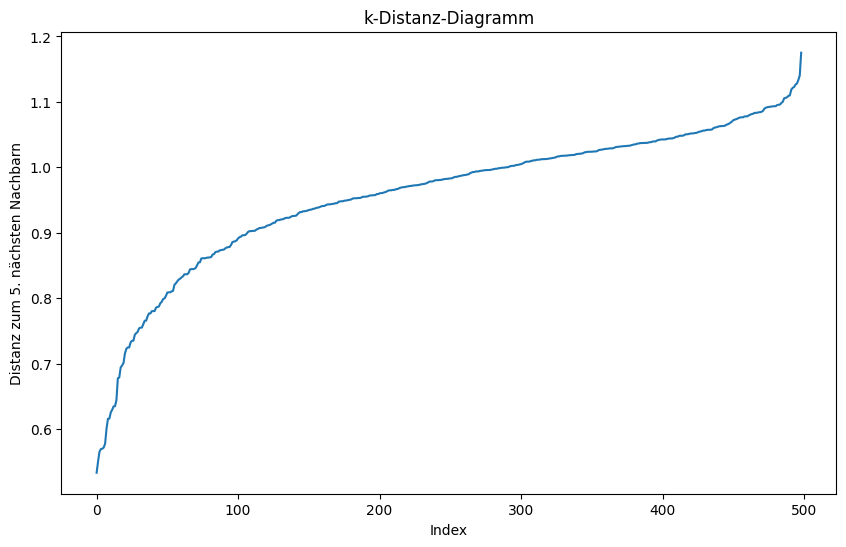

In [ ]:
# get threshold for process-new-ticket
nbrs = NearestNeighbors(n_neighbors=5).fit(embeddings)
distances, indices = nbrs.kneighbors(embeddings)

# k-Distanz for 5th neighbor
k_distances = distances[:, 4]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances_sorted)
plt.ylabel('Distanz zum 5. nächsten Nachbarn')
plt.xlabel('Index')
plt.title('k-Distanz-Diagramm')
plt.show()


In [ ]:
def process_new_ticket(df, reworked_ticket_text, embeddings, cluster_labels, threshold=0.5, dimension=None):

    new_embedding = get_openai_embeddings_addon([reworked_ticket_text], dimension=dimension)

    new_cluster_ids = {}
    assert new_embedding.ndim == 2, "New embedding array is not 2D"
    assert embeddings.ndim == 2, "Embeddings array is not 2D"

    distances = euclidean_distances(new_embedding, embeddings)
    min_distance = np.min(distances)
    new_cluster_created = False

    # Update cluster assignments
    for label in cluster_labels:
        cluster_data = df[label].to_numpy()
        if min_distance > threshold:
            print(min_distance, label)
            if 'dbscan' in label and -1 in cluster_data:
                valid_clusters = cluster_data[cluster_data != -1]
                new_cluster_id = np.max(valid_clusters) + 1 if valid_clusters.size > 0 else 0
            else:
                new_cluster_id = np.max(cluster_data) + 1
            new_cluster_created = True
        else:
            new_cluster_id = cluster_data[np.argmin(distances)]
            print(label, " ", new_cluster_id)
            print(min_distance)
        new_cluster_ids[label] = new_cluster_id
    # Append the new embedding to the existing array of embeddings
    embeddings = np.vstack([embeddings, new_embedding])

    # Create and append the new row to DataFrame later
    new_row_data = {
        'issue_title': 'New Ticket',
        'issue_description': new_ticket_description,
        'combined_text': new_ticket_description,
        'reworked_text': reworked_ticket_text,
    }

    new_row_data.update(new_cluster_ids)
    new_row = pd.DataFrame([new_row_data])

    df = pd.concat([df, new_row], ignore_index=True)

    return df, embeddings, new_cluster_ids, new_cluster_created

In [ ]:
# Add a new Ticket
new_ticket_description = "My new iPad does not allow to update to iOS 17.2"
reworked_ticket_text = rework_ticket_description_llama(new_ticket_description)
df_all, embeddings, new_cluster_ids_all, new_cluster_created_all = process_new_ticket(df_all, reworked_ticket_text, embeddings, df_all_cluster_labels, 0.9, None)


1.1026647934624856 kmeans_all
1.1026647934624856 dbscan_all
1.1026647934624856 spectral_all
1.1026647934624856 ward_all


In [ ]:
new_cluster_created_all

True

In [ ]:
# Drop the last 2 rows
df_all = df_all.iloc[:-1]
embeddings = embeddings[:-1]

In [ ]:
new_ticket_description = "My tablet cant update. it is not able to update to ios 19"

reworked_ticket_text = rework_ticket_description_llama(new_ticket_description)
df_all, embeddings, new_cluster_ids_all, new_cluster_created_all = process_new_ticket(df_all, reworked_ticket_text, embeddings, df_all_cluster_labels, 0.9, None)
df_50, embeddings_50, new_cluster_ids_50, new_cluster_created_50 = process_new_ticket(df_50, reworked_ticket_text, embeddings_50, df_50_cluster_labels, 0.1, 50)
df_200, embeddings_200, new_cluster_ids_200, new_cluster_created_200 = process_new_ticket(df_200, reworked_ticket_text, embeddings_200, df_200_cluster_labels, 0.1, 200)
df_scaled_all, embeddings_scaled, new_cluster_ids_scaled_all, new_cluster_created_scaled_all = process_new_ticket(df_scaled_all, reworked_ticket_text, embeddings_scaled, df_scaled_all_cluster_labels, 0.1, None)
df_scaled_50, embeddings_scaled_50, new_cluster_ids_scaled_50, new_cluster_created_scaled_50 = process_new_ticket(df_scaled_50, reworked_ticket_text, embeddings_scaled_50, df_scaled_50_cluster_labels, 0.1, 50)
df_scaled_200, embeddings_scaled_200, new_cluster_ids_scaled_200, new_cluster_created_scaled_200 = process_new_ticket(df_scaled_200, reworked_ticket_text, embeddings_scaled_200, df_scaled_200_cluster_labels, 0.1, 200)


kmeans_all   6
0.24352980700839458
dbscan_all   6
0.24352980700839458
spectral_all   6
0.24352980700839458
ward_all   7
0.24352980700839458
0.8442485316838693 kmeans_50
0.8442485316838693 dbscan_50
0.8442485316838693 spectral_50
0.8442485316838693 ward_50
0.963199935355541 kmeans_200
0.963199935355541 dbscan_200
0.963199935355541 spectral_200
0.963199935355541 ward_200
33.779275434574146 kmeans_all_scaled
33.779275434574146 dbscan_all_scaled
33.779275434574146 spectral_all_scaled
33.779275434574146 ward_all_scaled
20.329867542880752 kmeans_50_scaled
20.329867542880752 dbscan_50_scaled
20.329867542880752 spectral_50_scaled
20.329867542880752 ward_50_scaled
32.75597932106732 kmeans_200_scaled
32.75597932106732 dbscan_200_scaled
32.75597932106732 spectral_200_scaled
32.75597932106732 ward_200_scaled


In [ ]:
df_all.tail(5)

issue_title  \
496  change account membership   
497               new delivery   
498        support for monitor   
499                 New Ticket   
500                 New Ticket   

                                     issue_description  category  \
496  change membership hello please assign add grou...       4.0   
497  hello received po invoice please advise please...       5.0   
498  monitor hi guys monitor because low work monit...       5.0   
499  My tablet cant update. it is not able to updat...       NaN   
500  My tablet cant update. it is not able to updat...       NaN   

                                         combined_text  \
496  change account membership.  change membership ...   
497  new delivery.  hello received po invoice pleas...   
498  support for monitor.  monitor hi guys monitor ...   
499  My tablet cant update. it is not able to updat...   
500  My tablet cant update. it is not able to updat...   

                                         reworked_text  \
496  unable to change account membership. request t...   
497  user didn't receive shipment despite receiving...   
498  user needs support for monitor. monitor not wo...   
499                 Tablet unable to update to iOS 19.   
500                    Tablet cannot update to iOS 19.   

                                        combined_texts  kmeans_all  \
496  unable to change account membership. request t...           2   
497  user didn't receive shipment despite receiving...           1   
498  user needs support for monitor. monitor not wo...           3   
499                                                NaN           6   
500                                                NaN           6   

     dbscan_all  spectral_all  ward_all  
496          -1             1         4  
497           2             5         1  
498           5             4         6  
499           6             6         7  
500           6             6         7

#### If new cluster: create labels

In [ ]:

def extract_top_words_for_new_cluster(df, text_column, cluster_label, cluster_number):
    cluster_data = df[df[cluster_label] == cluster_number][text_column].dropna()
    if cluster_data.empty:
        return []

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data)
    feature_array = np.array(tfidf_vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(tfidf_matrix.toarray()).flatten()[::-1]

    top_n = 10  # You can adjust the number of top words
    top_words = feature_array[tfidf_sorting][:top_n]
    return top_words.tolist()


In [ ]:


def create_gpt3_label_for_cluster(top_words_list):
    prompt = "Generate a distinct, one-word label based on the following words: " + ", ".join(top_words_list)

    openai.api_key = os.getenv("OPENAI_API_KEY")
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "Generate a distinct one-word-label that categorizes the main features or issues represented by these top words."},
                {"role": "user", "content": ", ".join(top_words_list)}
            ]
        )
        label = response['choices'][0]['message']['content'].strip()
        return label
    except Exception as e:
        return str(e)


In [ ]:
df_all.tail(3)

issue_title                                  issue_description  \
498  support for monitor  monitor hi guys monitor because low work monit...   
499           New Ticket  My tablet cant update. it is not able to updat...   
500           New Ticket  My tablet cant update. it is not able to updat...   

     category                                      combined_text  \
498       5.0  support for monitor.  monitor hi guys monitor ...   
499       NaN  My tablet cant update. it is not able to updat...   
500       NaN  My tablet cant update. it is not able to updat...   

                                         reworked_text  \
498  user needs support for monitor. monitor not wo...   
499                 Tablet unable to update to iOS 19.   
500                    Tablet cannot update to iOS 19.   

                                        combined_texts  kmeans_all  \
498  user needs support for monitor. monitor not wo...           3   
499                                                NaN           6   
500                                                NaN           6   

     dbscan_all  spectral_all  ward_all  
498           5             4         6  
499           6             6         7  
500           6             6         7

In [ ]:
def remove_new_clusters(df, new_indices):
    return df.drop(index=new_indices)

showing new created clusters  and their topwords including the new label

In [ ]:
# Liste der DataFrames, Namen und zugehörigen Clustering-Infos
datasets = [
    (df_all, new_cluster_ids_all, new_cluster_created_all, "df_all"),
    (df_50, new_cluster_ids_50, new_cluster_created_50, "df_50"),
    (df_200, new_cluster_ids_200, new_cluster_created_200, "df_200"),
    (df_scaled_all, new_cluster_ids_scaled_all, new_cluster_created_scaled_all, "df_scaled_all"),
    (df_scaled_50, new_cluster_ids_scaled_50, new_cluster_created_scaled_50, "df_scaled_50"),
    (df_scaled_200, new_cluster_ids_scaled_200, new_cluster_created_scaled_200, "df_scaled_200")
]

all_cluster_results = []

# Bearbeite jedes Dataset
for (df, new_cluster_ids, new_cluster_created, df_name) in datasets:
    if new_cluster_created:
        new_cluster_data_list = []
        for label in new_cluster_ids:
            algo = label.split('_')[0]  # Algorithmusname aus dem Label extrahieren
            new_cluster_number = new_cluster_ids[label]
            new_cluster_top_words = extract_top_words_for_new_cluster(df, 'reworked_text', label, new_cluster_number)
            new_cluster_label = create_gpt3_label_for_cluster(new_cluster_top_words)
            new_cluster_data_list.append({
                'DataFrame': df_name,
                'Algorithm': algo,
                'Cluster': new_cluster_number,
                'TopWords': ", ".join(new_cluster_top_words),
                'GPT_Label': new_cluster_label
            })
        # Erzeuge DataFrame für das aktuelle Dataset
        new_cluster_data = pd.DataFrame(new_cluster_data_list)
        all_cluster_results.append(new_cluster_data)

# Zusammenführen aller Cluster-Ergebnisse
final_cluster_results = pd.concat(all_cluster_results, ignore_index=True)

# Sortieren nach 'Algorithm' und 'DataFrame'
final_cluster_results.sort_values(by=['Algorithm', 'DataFrame'], inplace=True)

# Anzeigen des finalen DataFrames
final_cluster_results


DataFrame Algorithm  Cluster                 TopWords   GPT_Label
5          df_200    dbscan        5  update, tablet, ios, 19  technology
1           df_50    dbscan        6  update, tablet, ios, 19  Technology
17  df_scaled_200    dbscan        5  update, tablet, ios, 19  Technology
13   df_scaled_50    dbscan        9  update, tablet, ios, 19  technology
9   df_scaled_all    dbscan        5  update, tablet, ios, 19  Technology
4          df_200    kmeans        6  update, tablet, ios, 19  Technology
0           df_50    kmeans        6  update, tablet, ios, 19  Technology
16  df_scaled_200    kmeans        5  update, tablet, ios, 19  Technology
12   df_scaled_50    kmeans        5  update, tablet, ios, 19  Technology
8   df_scaled_all    kmeans        5  update, tablet, ios, 19  Technology
6          df_200  spectral        6  update, tablet, ios, 19  Technology
2           df_50  spectral        6  update, tablet, ios, 19  technology
18  df_scaled_200  spectral        5  update, tablet, ios, 19  Technology
14   df_scaled_50  spectral        5  update, tablet, ios, 19  technology
10  df_scaled_all  spectral        5  update, tablet, ios, 19  Technology
7          df_200      ward        7  update, tablet, ios, 19  technology
3           df_50      ward        7  update, tablet, ios, 19  technology
19  df_scaled_200      ward        6  update, tablet, ios, 19  technology
15   df_scaled_50      ward        6  update, tablet, ios, 19  technology
11  df_scaled_all      ward        6  update, tablet, ios, 19  Technology

In [ ]:
df_scaled_all.tail(2)

issue_title                                  issue_description  \
498  support for monitor  monitor hi guys monitor because low work monit...   
499           New Ticket  My tablet cant update. it is not able to updat...   

     category                                      combined_text  \
498       5.0  support for monitor.  monitor hi guys monitor ...   
499       NaN  My tablet cant update. it is not able to updat...   

                                         reworked_text  \
498  user needs support for monitor. monitor not wo...   
499                    Tablet cannot update to iOS 19.   

                                        combined_texts  kmeans_all_scaled  \
498  user needs support for monitor. monitor not wo...                  1   
499                                                NaN                  5   

     dbscan_all_scaled  spectral_all_scaled  ward_all_scaled  
498                 -1                    0                5  
499                  5                    5                6

In [ ]:
final_cluster_results

DataFrame Algorithm  Cluster                 TopWords   GPT_Label
5          df_200    dbscan        5  update, tablet, ios, 19  technology
1           df_50    dbscan        6  update, tablet, ios, 19  Technology
17  df_scaled_200    dbscan        5  update, tablet, ios, 19  Technology
13   df_scaled_50    dbscan        9  update, tablet, ios, 19  technology
9   df_scaled_all    dbscan        5  update, tablet, ios, 19  Technology
4          df_200    kmeans        6  update, tablet, ios, 19  Technology
0           df_50    kmeans        6  update, tablet, ios, 19  Technology
16  df_scaled_200    kmeans        5  update, tablet, ios, 19  Technology
12   df_scaled_50    kmeans        5  update, tablet, ios, 19  Technology
8   df_scaled_all    kmeans        5  update, tablet, ios, 19  Technology
6          df_200  spectral        6  update, tablet, ios, 19  Technology
2           df_50  spectral        6  update, tablet, ios, 19  technology
18  df_scaled_200  spectral        5  update, tablet, ios, 19  Technology
14   df_scaled_50  spectral        5  update, tablet, ios, 19  technology
10  df_scaled_all  spectral        5  update, tablet, ios, 19  Technology
7          df_200      ward        7  update, tablet, ios, 19  technology
3           df_50      ward        7  update, tablet, ios, 19  technology
19  df_scaled_200      ward        6  update, tablet, ios, 19  technology
15   df_scaled_50      ward        6  update, tablet, ios, 19  technology
11  df_scaled_all      ward        6  update, tablet, ios, 19  Technology

#### Visualize New Ticket

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-119-0f84dd441836>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Spectral', len(unique_labels))
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-119-0f84dd441836>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor rel

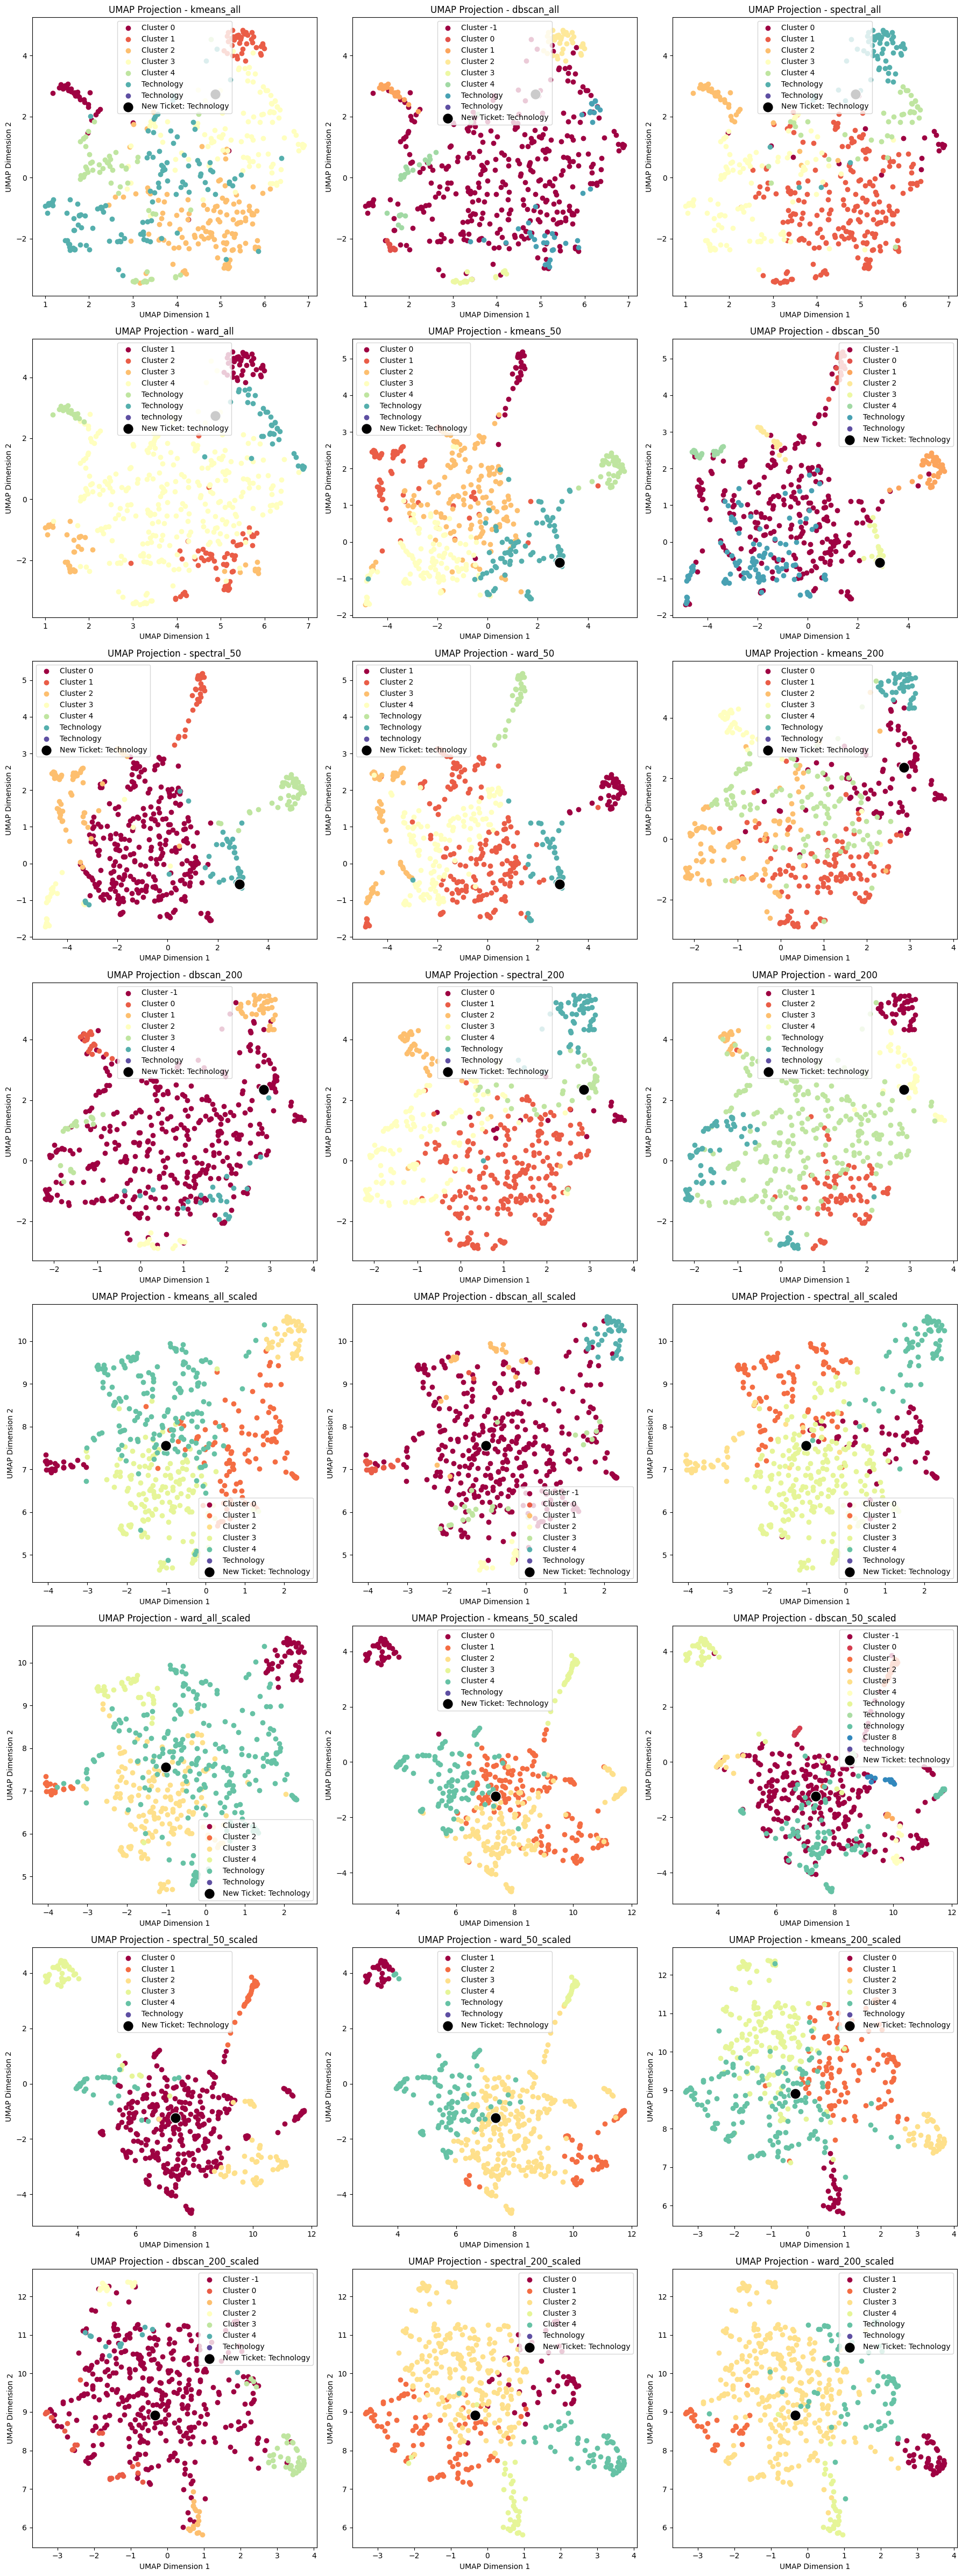

In [ ]:

def visualize_all_embeddings(embedding_list, df_list, cluster_label_lists, cluster_descriptions_list, new_ticket_indices):
    num_datasets = len(embedding_list)
    total_plots = sum(len(labels) for labels in cluster_label_lists)
    rows = total_plots // 3 + (total_plots % 3 > 0)  # Calculate how many rows needed for 3 plots per row
    fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))  # Adjust size as needed
    axes = axes.flatten()  # Flatten the axes array for easier iteration
    plot_index = 0

    for embedding, df, cluster_labels, cluster_descriptions, new_ticket_index in zip(embedding_list, df_list, cluster_label_lists, cluster_descriptions_list, new_ticket_indices):
        for label_name in cluster_labels:
            labels = df[label_name].to_numpy()
            reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
            embedding_2d = reducer.fit_transform(embedding)

            unique_labels = np.unique(labels)
            colors = plt.cm.get_cmap('Spectral', len(unique_labels))

            for j, label in enumerate(unique_labels):
                idx = labels == label
                description = cluster_descriptions.get(label, f'Cluster {label}')
                if isinstance(description, list):
                    description = ", ".join(description)  # Convert list to string if necessary
                axes[plot_index].scatter(embedding_2d[idx, 0], embedding_2d[idx, 1], color=colors(j), label=description)

            description_new = cluster_descriptions.get(labels[new_ticket_index], f'Cluster {labels[new_ticket_index]}')
            if isinstance(description_new, list):
                description_new = ", ".join(description_new)  # Convert list to string if necessary

            axes[plot_index].scatter(embedding_2d[new_ticket_index, 0], embedding_2d[new_ticket_index, 1],
                                     color='black', edgecolor='white', s=200, zorder=5,
                                     label='New Ticket: ' + description_new)

            axes[plot_index].set_title(f'UMAP Projection - {label_name}')
            axes[plot_index].set_xlabel('UMAP Dimension 1')
            axes[plot_index].set_ylabel('UMAP Dimension 2')
            axes[plot_index].legend(loc='best')
            plot_index += 1

    # Hide any unused subplots
    for ax in axes[plot_index:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

embedding_list = [embeddings, embeddings_50, embeddings_200, embeddings_scaled, embeddings_scaled_50, embeddings_scaled_200]
df_list = [df_all, df_50, df_200, df_scaled_all, df_scaled_50, df_scaled_200]

cluster_label_lists = [
    ['kmeans_all', 'dbscan_all', 'spectral_all', 'ward_all'],
    ['kmeans_50', 'dbscan_50', 'spectral_50', 'ward_50'],
    ['kmeans_200', 'dbscan_200', 'spectral_200', 'ward_200'],
    ['kmeans_all_scaled', 'dbscan_all_scaled', 'spectral_all_scaled', 'ward_all_scaled'],
    ['kmeans_50_scaled', 'dbscan_50_scaled', 'spectral_50_scaled', 'ward_50_scaled'],
    ['kmeans_200_scaled', 'dbscan_200_scaled', 'spectral_200_scaled', 'ward_200_scaled']
]

cluster_descriptions = pd.Series(final_cluster_results.GPT_Label.values, index=final_cluster_results.Cluster).to_dict()

cluster_descriptions_list = [cluster_descriptions] * 6  # Assuming the same descriptions apply to all
new_ticket_indices = [df.index[-1] for df in df_list]  # Assuming the last ticket is new for all DataFrames

visualize_all_embeddings(embedding_list, df_list, cluster_label_lists, cluster_descriptions_list, new_ticket_indices)


## Approach B: Clustering with LLM, UMAP and HDBSCAN

### Preprocessing Datas for Version 3

In [ ]:
df = load_data(DF_GR)
df.head(2)

issue_title  \
0                        annual leave   
1  change project manager role oracle   

                                   issue_description  category  
0  re annual leave hello please help absence reco...         4  
1  change role hello dear please change pm role s...         4

In [ ]:
print_column_names(df)

['issue_title', 'issue_description', 'category']


In [ ]:
df = drop_columns(df, ['ticket_type', 'sub_category1', 'sub_category2', 'business_service', 'urgency', 'impact'])

In [ ]:
source_columns = ['issue_title', 'issue_description']

new_column_name = 'combined_text'
combined_dataset = combine_columns(df, source_columns, new_column_name)

In [ ]:
df = replace_special_signs(df, 'combined_text')


### Create Ticket Labels For Each Ticket

In [ ]:
# Detailed instructions
def get_detailed_instructions_each_label():
  detailed_instructions = """
You are a highly capable technical support assistant. For each issue, create a clear two-word-label for categorization. Give me as return value only the two-word-label. Nothing else.
"""
  return detailed_instructions

In [ ]:
### set a predefined label to each ticket

def create_label_lama(ticket_text):
    detailed_instructions = get_detailed_instructions_each_label()

    groq_key = os.getenv('GROQ_KEY')
    client = Groq(api_key=groq_key)

    # try:
    # Creating a chat completion with system and user messages
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": detailed_instructions},
            {"role": "user", "content": ticket_text}
        ],
        model='llama3-70b-8192'
    )
   # print("\n************ ANTWORT *************\n", chat_completion.choices[0].message.content)

    # Check if the response is successful and has choices
    #  if 'choices' in chat_completion and len(chat_completion['choices']) >= 0:
    reworked_text = chat_completion.choices[0].message.content
    return reworked_text.strip()  # Removes any extra whitespace
       # else:
        #    return "Failed to generate reworked text. No valid response."


In [ ]:

def create_label_openai(ticket_text):

    openai.api_key = os.getenv("OPENAI_API_KEY")


    # get the prompt
    detailed_instructions = get_detailed_instructions_each_label()
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions},
                {"role": "user", "content": ticket_text}
            ]
        )

        if response and 'choices' in response and len(response['choices']) >= 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"




In [ ]:
# Check if the file already exists
data_path = DF_GR_LABEL
if not os.path.exists(data_path):
    # Load your data here if it's not loaded yet
    df['ticket_label'] = df['combined_text'].apply(lambda x: create_label_openai(x))

    # Save the DataFrame with new labels
    df.to_json(data_path, orient='records', lines=True)
else:
    print("File already exists. No need to process again.")
    df = pd.read_json(data_path, lines=True)

File already exists. No need to process again.


In [ ]:
replace_special_signs(df, 'ticket_label')

title  \
0                                     None   
1                     connection with icon   
2                     work experience user   
3                   requesting for meeting   
4    reset passwords for external accounts   
..                                     ...   
494                        new purchase po   
495                            card leaver   
496              change account membership   
497                           new delivery   
498                    support for monitor   

                                                  body  category  \
0    hi since recruiter lead permission approve req...         4   
1    icon dear please setup icon per icon engineers...         6   
2    work experience user hi work experience studen...         5   
3    requesting meeting hi please help follow equip...         5   
4    re expire days hi ask help update passwords co...         4   
..                                                 ...       ...   
494  purchase po dear purchased back cover please l...         5   
495                            card leaver la parasite         7   
496  change membership hello please assign add grou...         4   
497  hello received po invoice please advise please...         5   
498  monitor hi guys monitor because low work monit...         5   

                                         combined_text       ticket_label  
0    nan.  hi since recruiter lead permission appro...   Permission Issue  
1    connection with icon.  icon dear please setup ...        Setup Issue  
2    work experience user.  work experience user hi...    User Experience  
3    requesting for meeting.  requesting meeting hi...    Meeting request  
4    reset passwords for external accounts.  re exp...     password reset  
..                                                 ...                ...  
494  new purchase po.  purchase po dear purchased b...     Purchase Order  
495            card leaver.  card leaver la parasite.          Card issue  
496  change account membership.  change membership ...  Membership Change  
497  new delivery.  hello received po invoice pleas...    Email etiquette  
498  support for monitor.  monitor hi guys monitor ...      monitor issue  

[499 rows x 5 columns]

### Create Embeddings with Ticket Labels

In [ ]:
# USE OPENAI MODEL TO CREATE EMBEDDINGS OUT OF REWORKED INFORMATION
embeddings_file_path = EMBEDDINGS_GR_LABEL

texts = df['ticket_label'].tolist()
embeddings = get_embeddings_impl(texts, embeddings_file_path)


./drive/Othercomputers/X1/code/datas/embeddings/embeddings_gr_label.npy


### Use UMAP To Get Best Embedding-Version

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

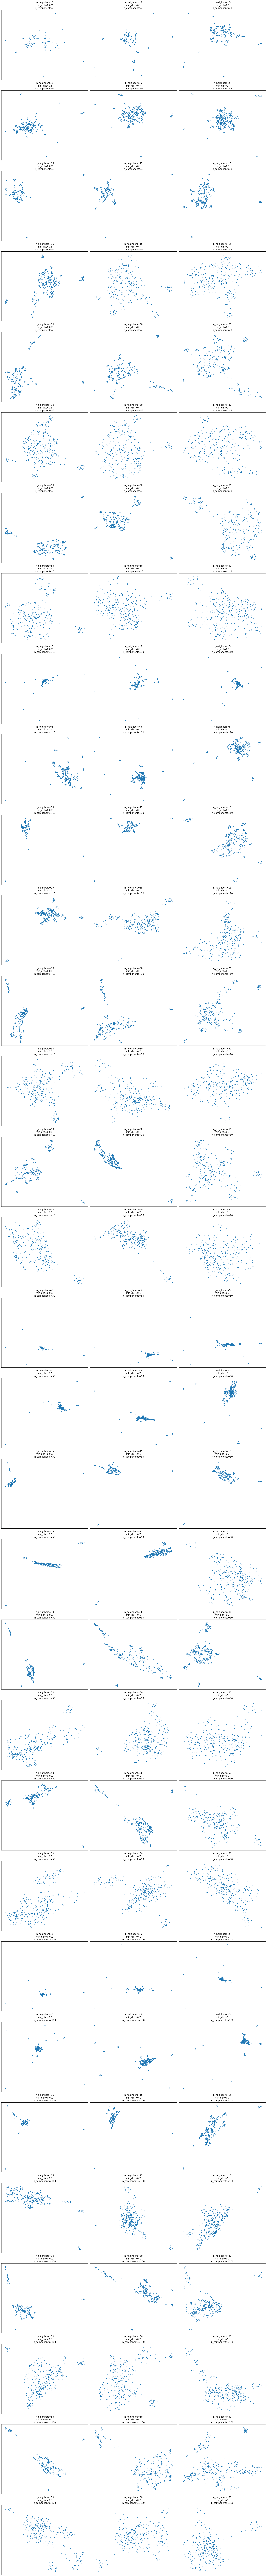

In [ ]:

# Parameters grid

n_neighbors_options = [5, 15, 30, 50]
min_dist_options = [0.001, 0.1, 0.3, 0.5, 0.7, 1]
dimension_options = [3, 10, 50, 100]

max_plots_per_row = 3

total_plots = len(n_neighbors_options) * len(min_dist_options) * len(dimension_options)
rows = (total_plots // max_plots_per_row) + int(total_plots % max_plots_per_row != 0)
cols = min(total_plots, max_plots_per_row)

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 6))  # Increase height per row

axs = axs.flatten()

plot_idx = 0
for n_components in dimension_options:
    for n_neighbors in n_neighbors_options:
        for min_dist in min_dist_options:
            reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
            embedding = reducer.fit_transform(embeddings)

            ax = axs[plot_idx]
            ax.scatter(embedding[:, 0], embedding[:, 1], s=5)
            ax.set_title(f'n_neighbors={n_neighbors}\nmin_dist={min_dist}\nn_components={n_components}')
            ax.set_xticks([])
            ax.set_yticks([])
            plot_idx += 1

# Hide any unused subplots
for idx in range(plot_idx, len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


### Use best Embedding To Get Clusters


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


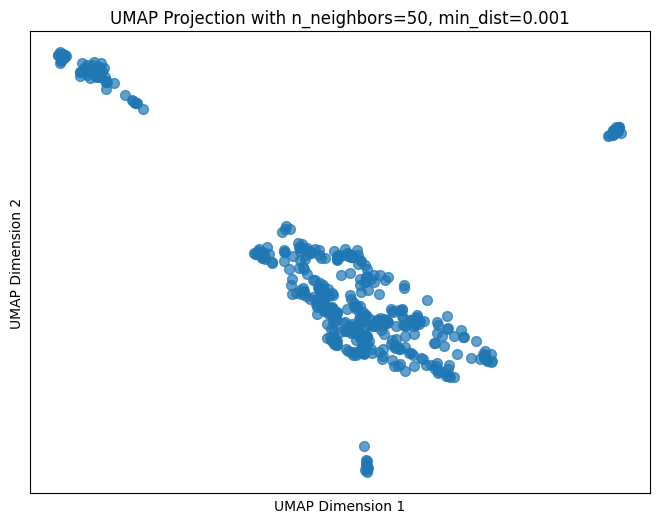

In [ ]:
my_labels, uniques = pd.factorize(df['ticket_label'])

# Set specific UMAP parameters
n_neighbors = 50
min_dist = 0.001
n_components =100

reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
optimal_embedding = reducer.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(optimal_embedding[:, 0], optimal_embedding[:, 1], s=50, alpha=0.7)  # Increased point size for better visibility

plt.title(f'UMAP Projection with n_neighbors={n_neighbors}, min_dist={min_dist}')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
plt.show()

In [ ]:

min_samples_range = [5, 10 ,15, 17]
min_cluster_sizes_range = [5, 10, 15, 20, 30]


best_db_index = float('inf')
best_silhouette_score = float('-inf')
best_params_db = {}
best_params_silhouette = {}

for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_sizes_range:
        clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        cluster_labels = clusterer.fit_predict(optimal_embedding)

        if len(np.unique(cluster_labels[cluster_labels != -1])) > 1:
            db_index = davies_bouldin_score(optimal_embedding, cluster_labels)
            silhouette = silhouette_score(optimal_embedding, cluster_labels)

            if db_index < best_db_index:
                best_db_index = db_index
                best_params_db = {'min_samples': min_samples, 'min_cluster_size': min_cluster_size}

            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params_silhouette = {'min_samples': min_samples, 'min_cluster_size': min_cluster_size}

    print("Best parameters for Davies-Bouldin Index:", best_params_db)
    print("Best Davies-Bouldin Index:", best_db_index)
    print("Best parameters for Silhouette Score:", best_params_silhouette)
    print("Best Silhouette Score:", best_silhouette_score)


Best parameters for Davies-Bouldin Index: {'min_samples': 5, 'min_cluster_size': 20}
Best Davies-Bouldin Index: 0.2785685090954104
Best parameters for Silhouette Score: {'min_samples': 5, 'min_cluster_size': 20}
Best Silhouette Score: 0.7005279
Best parameters for Davies-Bouldin Index: {'min_samples': 5, 'min_cluster_size': 20}
Best Davies-Bouldin Index: 0.2785685090954104
Best parameters for Silhouette Score: {'min_samples': 5, 'min_cluster_size': 20}
Best Silhouette Score: 0.7005279
Best parameters for Davies-Bouldin Index: {'min_samples': 5, 'min_cluster_size': 20}
Best Davies-Bouldin Index: 0.2785685090954104
Best parameters for Silhouette Score: {'min_samples': 5, 'min_cluster_size': 20}
Best Silhouette Score: 0.7005279
Best parameters for Davies-Bouldin Index: {'min_samples': 5, 'min_cluster_size': 20}
Best Davies-Bouldin Index: 0.2785685090954104
Best parameters for Silhouette Score: {'min_samples': 5, 'min_cluster_size': 20}
Best Silhouette Score: 0.7005279


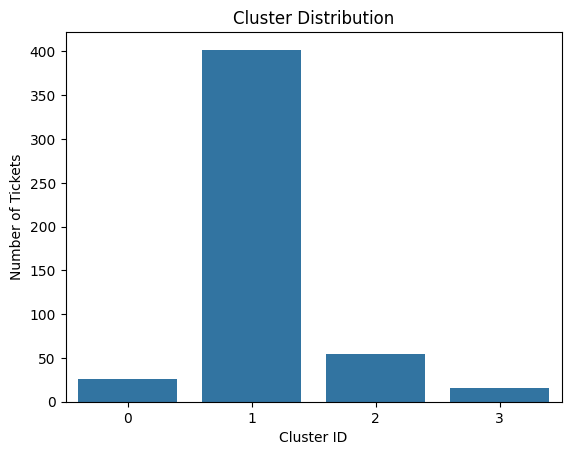

In [ ]:
# Good Silhouette Score and DBI, but it gives me only 3 clusters. Therefore i set the min_cluster_size to the next lower level.
clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=15)
cluster_labels = clusterer.fit_predict(optimal_embedding)

# Add cluster labels to your original DataFrame
df['cluster_label'] = cluster_labels

sns.countplot(x='cluster_label', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Tickets')
plt.show()


In [ ]:
unique_clusters = np.unique(cluster_labels)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

print("Number of clusters found:", num_clusters)
print("Clusters IDs:", unique_clusters[unique_clusters != -1])

Number of clusters found: 4
Clusters IDs: [0 1 2 3]


### Visualize Clusters

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


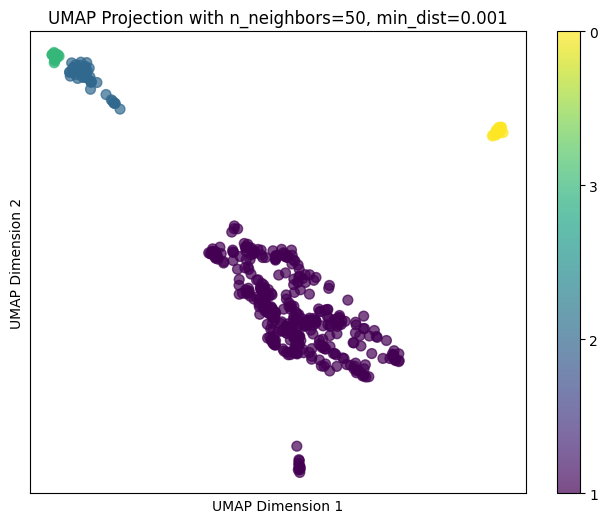

In [ ]:
my_labels, uniques = pd.factorize(df['cluster_label'])

# Initialize UMAP with the fixed random state and specified parameters
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)

# Fit UMAP on the data
optimal_embedding = reducer.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(8, 6))
#plt.scatter(embedding[:, 0], embedding[:, 1], s=50, alpha=0.7)  # Increased point size for better visibility
scatter_plot = plt.scatter(optimal_embedding[:, 0], optimal_embedding[:, 1], c=my_labels, cmap='viridis', s=50, alpha=0.7)

# Create a colorbar with the unique labels
colorbar = plt.colorbar(scatter_plot)
colorbar.set_ticks(np.arange(len(uniques)))
colorbar.set_ticklabels(uniques)

plt.title(f'UMAP Projection with n_neighbors={n_neighbors}, min_dist={min_dist}')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
plt.show()

### "True Label vs Calculated Label" - Problem

Nun habe ich eine Liste der ticket_labels welche zusammengehören.

In [ ]:
def assign_majority_label(df, cluster_col='cluster_label', true_label_col='category'):
    # Function to calculate the mode using pandas directly
    def calculate_mode(series):
        return series.mode().iloc[0]

    # Group by cluster label and apply mode to find the most common true label in each cluster
    majority_labels = df.groupby(cluster_col)[true_label_col].apply(calculate_mode).to_dict()

    # Map the majority labels back to each row in the dataframe based on its cluster label
    df['aligned_label'] = df[cluster_col].map(majority_labels)
    return df

# Assign majority labels
df = assign_majority_label(df)



### Validate - Calculate Accuracy and F1 Score

In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(df['category'], df['aligned_label'])
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.70


In [ ]:
# Calculate F1 Score
f1 = f1_score(df['category'], df['aligned_label'], average='weighted')  # Use 'weighted' for imbalanced classes
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.61


### Generate meaninful Group-Labels

To have useful namings use an LLM to generate a group-label out of the ticket-labels which correspont together.

In [ ]:
# Funktion zur Kategorisierung von Tickets
def categorize_tickets(labels):
    try:
        ticket_text = "".join(labels)
        detailed_instructions = detailed_instructions = "Create a one-word-group label out these ticket-labels: " + ticket_text

        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": detailed_instructions}
            ]
        )

        # Überprüfung, ob eine gültige Antwort erhalten wurde
        if response and 'choices' in response and len(response['choices']) > 0 and 'message' in response['choices'][0]:
            reworked_text = response['choices'][0]['message']['content']  # Korrekte Art, auf den Inhalt zuzugreifen
            return reworked_text.strip()
        else:
            return "No valid response received."
    except Exception as e:
        return f"An error occurred: {str(e)}"


df['ticket_label'] = df['ticket_label'].str.lower()


# Group labels and categorize them
grouped_tickets = df.groupby('cluster_label')['ticket_label'].apply(list)

# Apply categorization to each group
group_descriptions = grouped_tickets.apply(categorize_tickets)

# Map the new descriptions back to the DataFrame
df['grouped_label'] = df['cluster_label'].map(group_descriptions)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


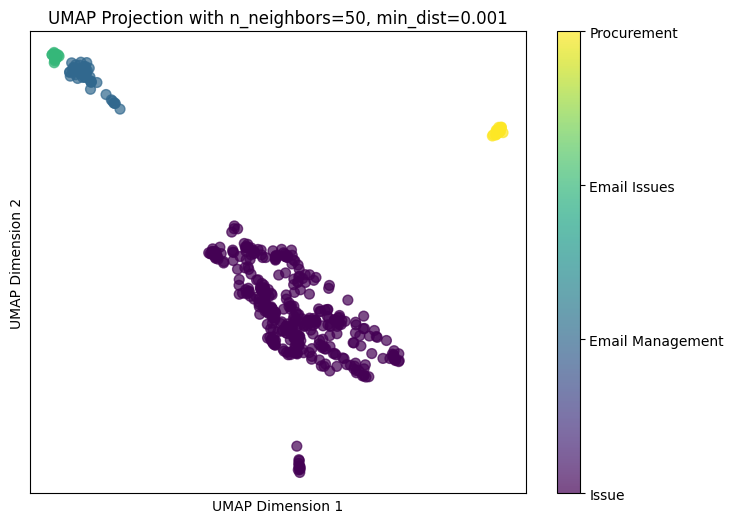

In [ ]:
my_labels, uniques = pd.factorize(df['grouped_label'])

reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)

# Fit UMAP on the data
optimal_embedding = reducer.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(8, 6))
#plt.scatter(embedding[:, 0], embedding[:, 1], s=50, alpha=0.7)  # Increased point size for better visibility
scatter_plot = plt.scatter(optimal_embedding[:, 0], optimal_embedding[:, 1], c=my_labels, cmap='viridis', s=50, alpha=0.7)

# Create a colorbar with the unique labels
colorbar = plt.colorbar(scatter_plot)
colorbar.set_ticks(np.arange(len(uniques)))
colorbar.set_ticklabels(uniques)

plt.title(f'UMAP Projection with n_neighbors={n_neighbors}, min_dist={min_dist}')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks
plt.show()

### Add new Tickets

In [ ]:
def add_new_ticket(df, ticket_title, ticket_description, new_cluster_ids, rework_ticket_description_llama, create_label_lama):
    """
    Adds a new ticket to the DataFrame with reworked text and assigned cluster labels.

    Parameters:
    - df (pd.DataFrame): The original DataFrame.
    - ticket_title (str): The title of the ticket.
    - ticket_description (str): The description of the ticket.
    - new_cluster_ids (dict): Dictionary of new cluster IDs to update.
    - rework_ticket_description_llama (callable): Function to rework ticket descriptions.
    - create_label_lama (callable): Function to create labels.

    Returns:
    - pd.DataFrame: Updated DataFrame with the new ticket added.
    """

    # Combine title and description and rework the text
    combined_text = ticket_title + " " + ticket_description
    reworked_text = rework_ticket_description_llama(combined_text)

    # Prepare new row data
    new_row_data = {
        'issue_title': ticket_title,
        'issue_description': ticket_description,
        'combined_text': combined_text,
        'reworked_text': reworked_text,
    }

    # Update the row with new cluster IDs
    new_row_data.update(new_cluster_ids)

    # Create a new DataFrame row and append it to the existing DataFrame
    new_row = pd.DataFrame([new_row_data])
    df = pd.concat([df, new_row], ignore_index=True)

    # Create a ticket label for the new row and append it
    df.at[df.index[-1], 'ticket_label'] = create_label_lama(df.at[df.index[-1], 'reworked_text'])

    return df


In [ ]:
def assign_cluster_based_on_embedding(df, optimal_embedding, cluster_labels):
    """
    Analyzes the nearest neighbors of a new data point's embedding and assigns a cluster label based on the nearest neighbor's cluster and adjusted majority rules for small clusters.

    Parameters:
    df (pd.DataFrame): DataFrame containing ticket data.
    optimal_embedding (numpy.ndarray): Array of embeddings for existing data points.
    cluster_labels (numpy.ndarray): Array of cluster labels for existing data points.

    Returns:
    pd.DataFrame: Updated DataFrame with new cluster assignment.
    """
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(optimal_embedding)
    new_ticket_text = df.iloc[-1]['ticket_label']
    new_ticket_embedding = get_openai_embeddings_addon(new_ticket_text, optimal_embedding.shape[1])

    if new_ticket_embedding.shape[1] != optimal_embedding.shape[1]:
        raise ValueError("Dimensionality mismatch between new ticket embedding and optimal dimension.")

    new_ticket_embedding = new_ticket_embedding.reshape(1, -1)
    distances, indices = nbrs.kneighbors(new_ticket_embedding)

    print("Distances to the 5 nearest neighbors:", distances.flatten())

    # Identify the cluster of the nearest neighbor
    nearest_neighbor_index = indices.flatten()[0]  # index of the nearest neighbor
    nearest_neighbor_cluster = cluster_labels[nearest_neighbor_index]  # cluster of the nearest neighbor
    nearest_neighbor_distance = distances.flatten()[0]  # distance of the nearest neighbor

    optimal_embedding = np.vstack([optimal_embedding, new_ticket_embedding])
    cluster_labels = np.append(cluster_labels, -1)

    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    threshold = mean_distance + std_distance

    # Calculate the size of the nearest neighbor's cluster
    cluster_size = len([c for c in cluster_labels if c == nearest_neighbor_cluster])
    print(cluster_size)

    # Set majority threshold based on the size of the nearest neighbor's cluster
    majority_threshold = 50 if cluster_size >= 5 else 0  # No majority threshold for small clusters

    if nearest_neighbor_distance > threshold or cluster_size < 5:
        print("Assign to a new cluster due to distance or small cluster size")
        new_cluster_label = max(cluster_labels) + 1
        cluster_labels[-1] = new_cluster_label
        df.loc[df.index[-1], 'cluster_label'] = new_cluster_label
        df.loc[df.index[-1], 'grouped_label'] = "New Cluster Group"
    else:
        print("Assign to existing cluster")
        cluster_labels[-1] = nearest_neighbor_cluster
        df.loc[df.index[-1], 'cluster_label'] = nearest_neighbor_cluster
        grouped_label = df[df['cluster_label'] == nearest_neighbor_cluster]['grouped_label'].iloc[0]
        df.loc[df.index[-1], 'grouped_label'] = grouped_label

    return df, optimal_embedding, cluster_labels


In [ ]:
# adding a new ticket
df = add_new_ticket(df, "Problems with app", "Where do I start the download for pdf?", new_cluster_ids, rework_ticket_description_llama, create_label_lama)
df, optimal_embedding, cluster_labels = assign_cluster_based_on_embedding(df, optimal_embedding, cluster_labels)


Distances to the 5 nearest neighbors: [52.24160759 52.27939431 52.28368609 52.28458168 52.29640381]
402
Assign to existing cluster


In [ ]:
# adding a similar new ticket
df = add_new_ticket(df,  "mobile", "My new iPad does not allow to update to iOS 17.2?", new_cluster_ids, rework_ticket_description_llama, create_label_lama)
df, optimal_embedding, cluster_labels = assign_cluster_based_on_embedding(df, optimal_embedding, cluster_labels)


Distances to the 5 nearest neighbors: [ 1.16157555 52.21229913 52.25022505 52.25488052 52.25512532]
403
Assign to existing cluster


In [ ]:
# Cluster-Labels extrahieren
cluster_labels = df['cluster_label'].values

# Berechnung der Metriken
silhouette_avg = silhouette_score(optimal_embedding, cluster_labels)
davies_bouldin = davies_bouldin_score(optimal_embedding, cluster_labels)

print("Silhouette-Score:", silhouette_avg)
print("Davies-Bouldin-Index:", davies_bouldin)


Silhouette-Score: 0.008743871104018334
Davies-Bouldin-Index: 4.424434492135103


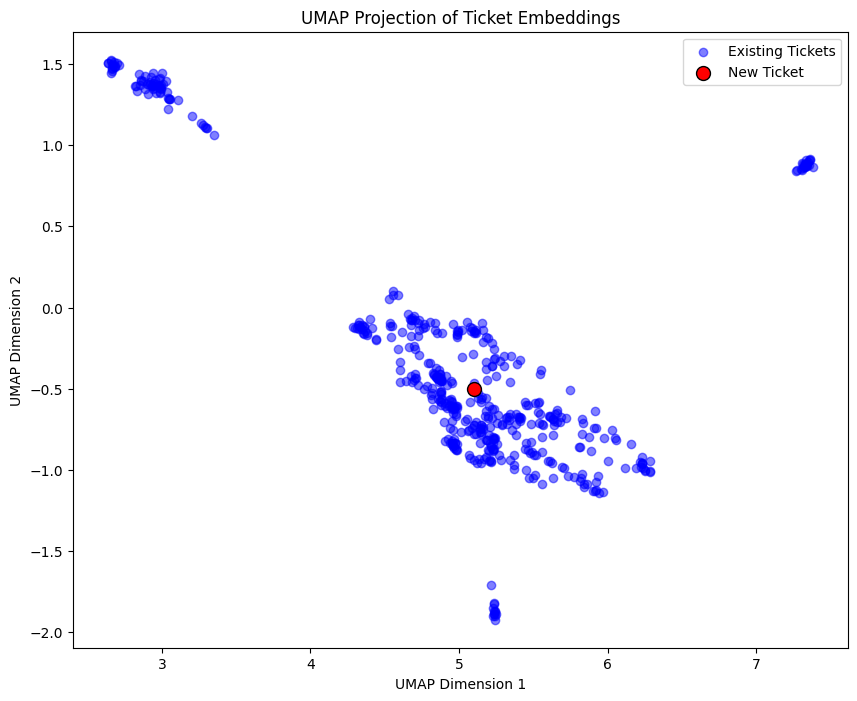

In [ ]:
# Plotten der Embeddings
plt.figure(figsize=(10, 8))

# Plotten der bestehenden Embeddings
plt.scatter(optimal_embedding[:-1, 0], optimal_embedding[:-1, 1], c='blue', label='Existing Tickets', alpha=0.5)

# Plotten des neuen Tickets
plt.scatter(optimal_embedding[-1, 0], optimal_embedding[-1, 1], c='red', label='New Ticket', edgecolors='k', s=100)

# Hinzufügen von Titeln und Labels
plt.title('UMAP Projection of Ticket Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()
